# Analysis of AMEO Data

# Introduction
###  Dataset Description
The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds,
focuses on employment outcomes for engineering graduates. It includes dependent variables such
as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical
skills, and personality skills. With around 39 independent variables and 4000 data points, these
variables encompass both continuous and categorical data. The dataset also includes demographic
features and unique identifiers for each candidate.

### Objective
The goal of this Exploratory Data Analysis (EDA) is to extensively investigate the provided dataset,
with a particular emphasis on understanding the link between various variables and the target
variable, Salary.
The key aims of this analysis include:
• Providing a detailed explanation of the dataset’s features.
• Find any observable patterns or trends in the data.
• Investigating the relationships between the independent factors and the target variable
(salary).
• Identify any outliers or abnormalities in the dataset.
• Offering practical insights and recommendations based on the analysis.

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

# The head, shape and description of the data.

In [2]:
df = pd.read_csv('data.xlsx - Sheet1.csv')

df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [3]:
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

# Data Description

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [8]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [9]:
df.duplicated().any()

False

In [10]:
df.describe().style.background_gradient(cmap='plasma')

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,663794.540520,307699.849925,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,363218.245829,212737.499957,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,11244.000000,35000.000000,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,334284.250000,180000.000000,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,639600.000000,300000.000000,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,990480.000000,370000.000000,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1298275.000000,4000000.000000,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


# Data Preprocessing

In [11]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object']

# creating list of numerical columns to standardized data 
numerical_columns = [col for col in df.columns if (df.dtypes[col] != 'object')]

print('Numerical Features are : ',numerical_columns)
print('\n')
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['ID', 'Salary', '10percentage', '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


Categorical Features are :  ['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']


### Assuming 'data' is your DataFrame and 'columns_to_check' are the columns with -1 values

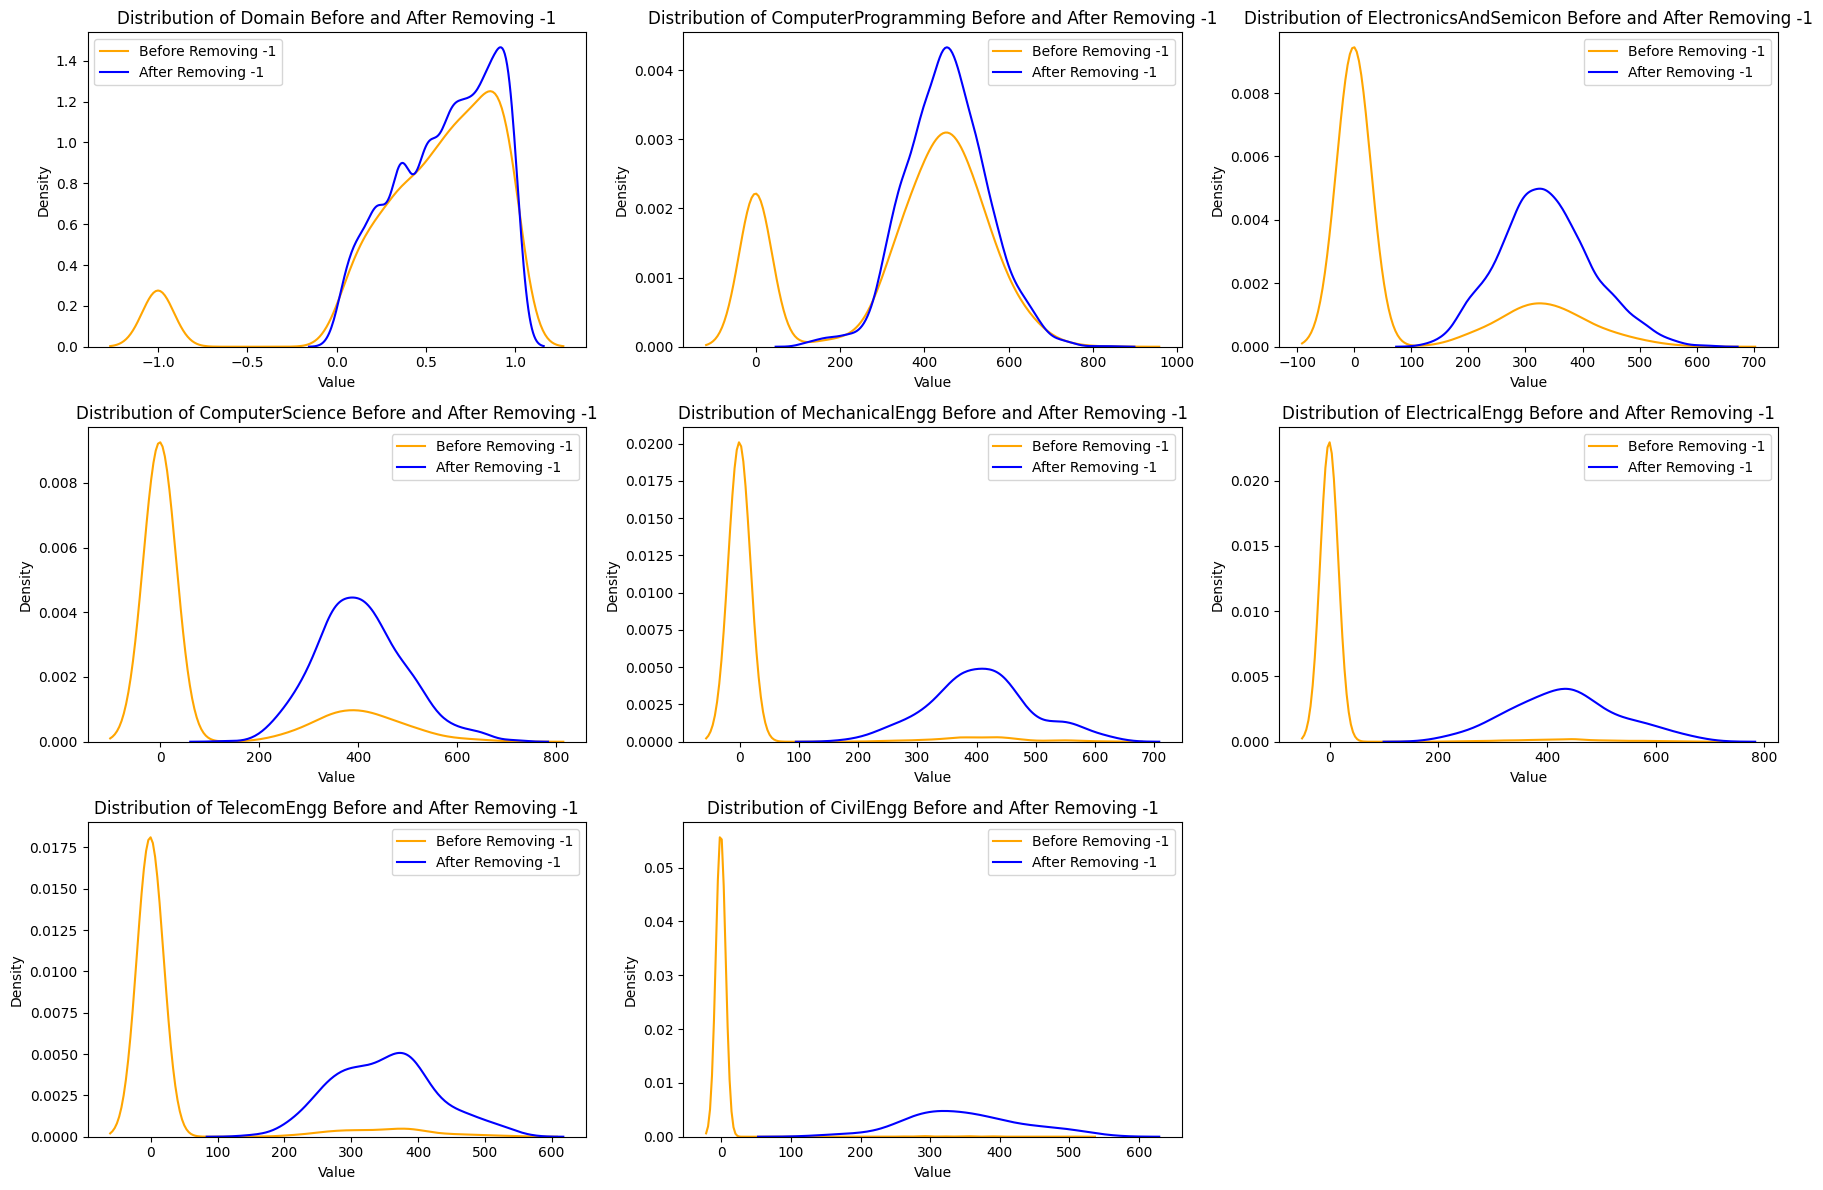

In [12]:

columns_to_check = ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

plt.figure(figsize=(18, 12))

for i, column_name in enumerate(columns_to_check, start=1):  # Use start=1 to start subplot numbering from 1
    plt.subplot(3, 3, i)  # Assuming you want a 3x3 grid of subplots
    sns.kdeplot(df[column_name], color='orange', label='Before Removing -1')
    filtered_df = df[df[column_name] != -1]
    sns.kdeplot(filtered_df[column_name], color='blue', label='After Removing -1')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Distribution of ' + column_name + ' Before and After Removing -1')
    plt.legend()

plt.tight_layout()
plt.show()

##### After analyzing the plots above, we conclude that before and after removing the -1 values, the graphs show varying changes in density. Some columns exhibit an increase in density, while others show a decrease. This observation suggests that the removal of -1 values impacts the distribution of data differently across columns.

In [13]:
df1 = df.copy()

### Datatype Conversion

### Replace -1 with NaN for numerical & objective columns

In [14]:
df1.replace(-1, np.NaN,inplace=True)

In [15]:
# Replace -1 with NaN for object columns
obj_columns = df.select_dtypes(include='object').columns
df1[obj_columns] = df1[obj_columns].replace('-1', np.NaN) 

In [16]:
### show the DOL column values counts 

In [17]:
# show the DOL column values counts 
df1['DOL'].value_counts()

DOL
present         1875
4/1/15 0:00      573
3/1/15 0:00      124
5/1/15 0:00      112
1/1/15 0:00       99
                ... 
3/1/05 0:00        1
10/1/15 0:00       1
2/1/10 0:00        1
2/1/11 0:00        1
10/1/10 0:00       1
Name: count, Length: 67, dtype: int64

In [18]:
# Assuming 'data' is your DataFrame
df1['DOL'] = pd.to_datetime(df1['DOL'], errors='coerce')

In [19]:
# Assuming 'data' is your DataFrame
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['DOL'] = pd.to_datetime(df1['DOL'])
df1['DOJ'] = pd.to_datetime(df1['DOJ'])

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   float64       
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    2123 non-null   datetime64[ns]
 5   Designation            3998 non-null   object        
 6   JobCity                3537 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [21]:
df1.isnull().sum()/len(df1)*100

Unnamed: 0                0.000000
ID                        0.000000
Salary                    0.000000
DOJ                       0.000000
DOL                      46.898449
Designation               0.000000
JobCity                  11.530765
Gender                    0.000000
DOB                       0.000000
10percentage              0.000000
10board                   0.000000
12graduation              0.000000
12percentage              0.000000
12board                   0.000000
CollegeID                 0.000000
CollegeTier               0.000000
Degree                    0.000000
Specialization            0.000000
collegeGPA                0.000000
CollegeCityID             0.000000
CollegeCityTier           0.000000
CollegeState              0.000000
GraduationYear            0.000000
English                   0.000000
Logical                   0.000000
Quant                     0.000000
Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemico

##### In the given columns, some columns have null values exceeding 70%, while the remaining columns have zero null values.

In [22]:
# drop the unused columns
df1 = df1.drop(['Unnamed: 0', 'ID', 'DOJ', 'DOL', 'DOB', 'CollegeID', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'] ,axis=1)

df1.head(2)

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.9737,0.8128,0.5269,1.3549,-0.4455
1,500000.0,assistant manager,Indore,m,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,-0.7335,0.3789,1.2396,-0.1076,0.8637


# outlier 

In [23]:
df['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [24]:
# Calculate the IQR
Q1 = df1['Salary'].quantile(0.25)
Q3 = df1['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df1[(df['Salary'] < lower_bound) | (df1['Salary'] > upper_bound)]
outliers.head()

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3,1100000.0,senior software engineer,Gurgaon,m,85.60,cbse,2007,83.60,cbse,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.0464,0.3448,-0.3440,-0.4078,-0.9194
76,800000.0,software engineer,Bangalore,m,93.44,karnataka state board,2008,90.00,karnataka state board,2,B.Tech/B.E.,computer engineering,87.60,1384,0,Karnataka,2012,515,475,635,-0.4173,0.9688,-0.1988,-0.2902,0.3049
92,1500000.0,application developer,Hyderabad,m,79.00,state board,2009,87.90,state board,2,B.Tech/B.E.,computer science & engineering,66.00,9557,1,Telangana,2013,315,435,355,0.4155,0.5454,0.9322,-0.6147,0.8637
123,1200000.0,engineer trainee,Maharajganj,m,59.80,icse,2006,60.25,isc,2,B.Tech/B.E.,mechanical engineering,68.63,5690,0,Uttar Pradesh,2010,575,595,405,0.2009,1.1248,1.1074,-1.1128,0.9763
128,675000.0,senior software engineer,Noida,m,60.00,0,2004,59.00,0,2,B.Tech/B.E.,computer engineering,67.00,144,0,Uttar Pradesh,2011,515,555,425,-0.8810,-0.2793,-0.6343,-0.6428,-2.9731


In [25]:
# Remove outliers
df1 = df1[(df1['Salary'] >= lower_bound) & (df1['Salary'] <= upper_bound)]

df1

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,senior quality engineer,Bangalore,f,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,assistant manager,Indore,m,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,systems engineer,Chennai,f,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.2718,1.7109,0.1637,-0.86820,0.6721
4,200000.0,get,Manesar,m,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,300000.0,system engineer,Hyderabad,m,89.92,state board,2010,87.00,state board,2,B.Tech/B.E.,electronics and communication engineering,76.32,5086,0,Karnataka,2014,560,555,620,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000.0,software engineer,New Delhi,m,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000.0,technical writer,Hyderabad,f,90.00,state board,2009,93.00,state board,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000.0,associate software engineer,Bangalore,m,81.86,"bse,odisha",2008,65.50,"chse,odisha",2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000.0,software developer,Asifabadbanglore,f,78.72,state board,2010,69.88,state board,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [26]:
df1['Salary'].describe()

count      3889.000000
mean     285447.158653
std      126514.542129
min       35000.000000
25%      180000.000000
50%      300000.000000
75%      360000.000000
max      655000.000000
Name: Salary, dtype: float64

# Exploratory Data Analysis

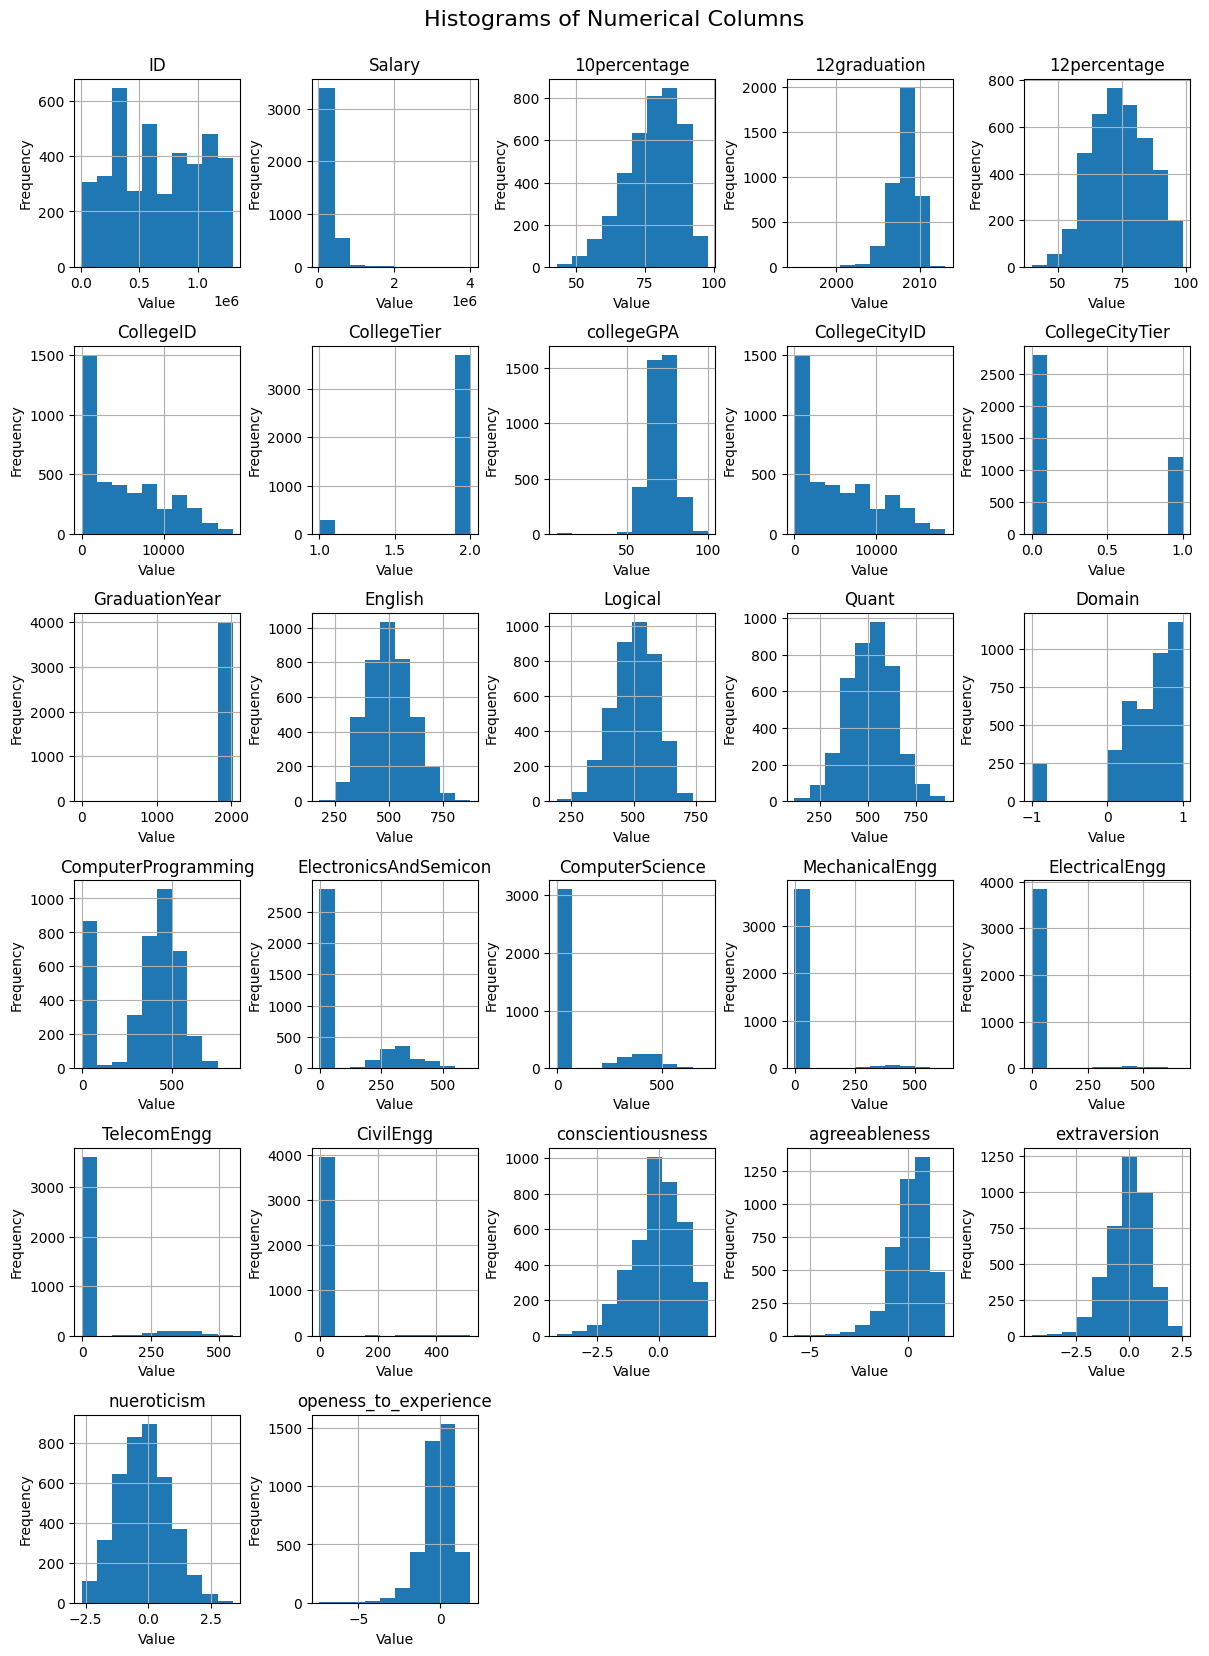

In [27]:
# Histograms
df.hist(figsize=(12, 16))
plt.tight_layout()  # Adjust spacing between plots
plt.suptitle('Histograms of Numerical Columns', y=1.02, fontsize=16)  # Title for all histograms

# Labeling axes for each histogram
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.show()

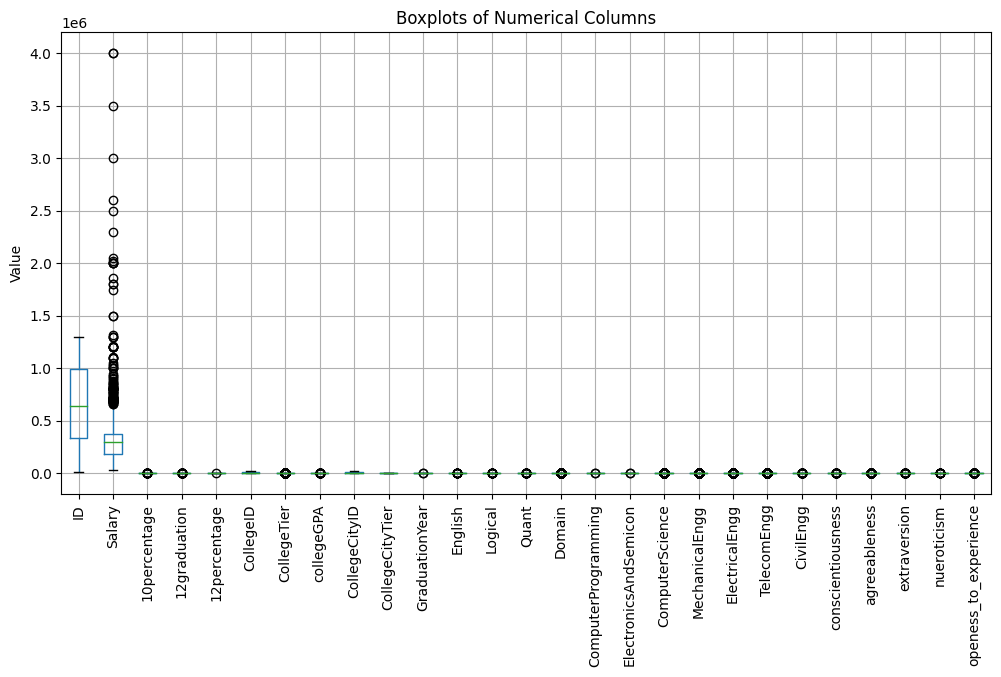

In [28]:
# Boxplots
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Boxplots of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

##### In the above plot numerical columns  more ouliers in the Salary column

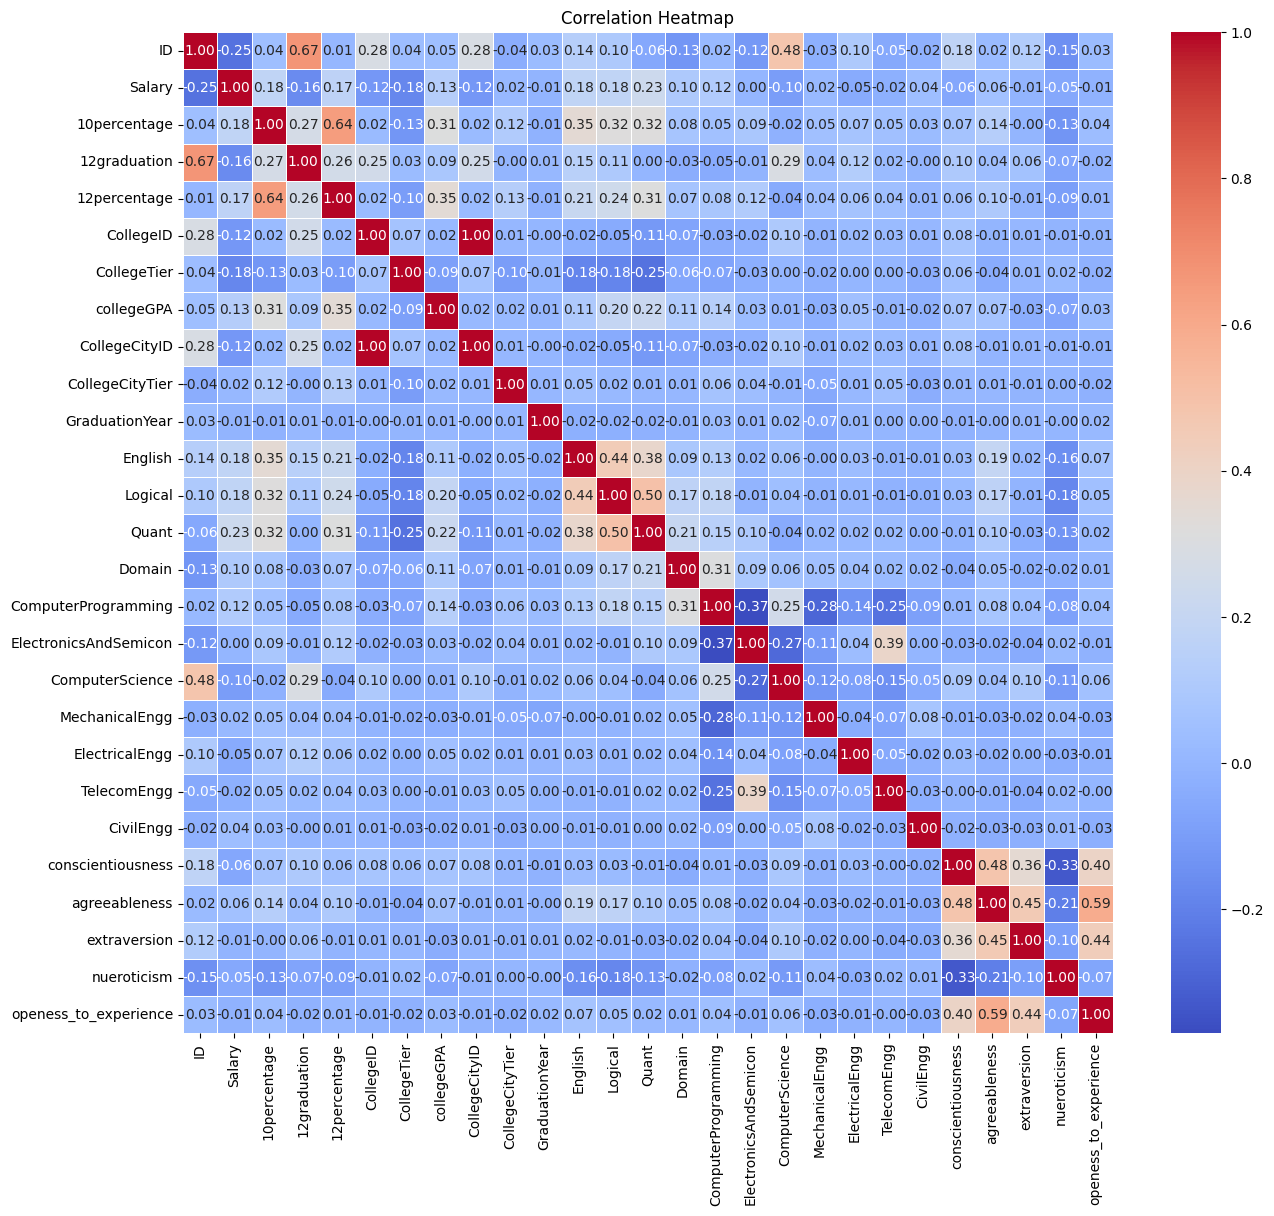

In [29]:
temp = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 13))
sns.heatmap(temp.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Univariate Analysis

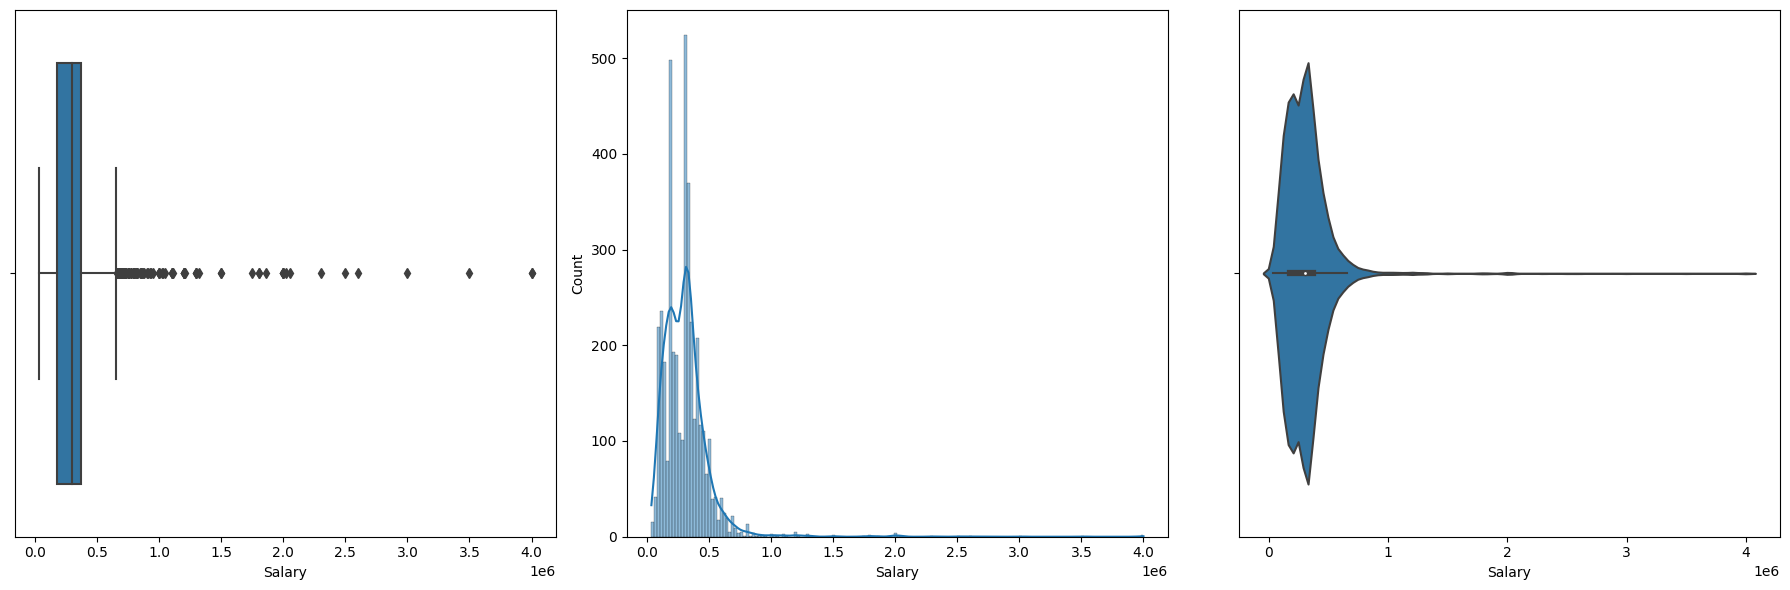

In [30]:
plt.figure(figsize=(18, 6))

# Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='Salary', data=df)

# Histogram with KDE
plt.subplot(1, 3, 2)
sns.histplot(df['Salary'], kde=True)

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(x='Salary', data=df)

plt.tight_layout()
plt.show()

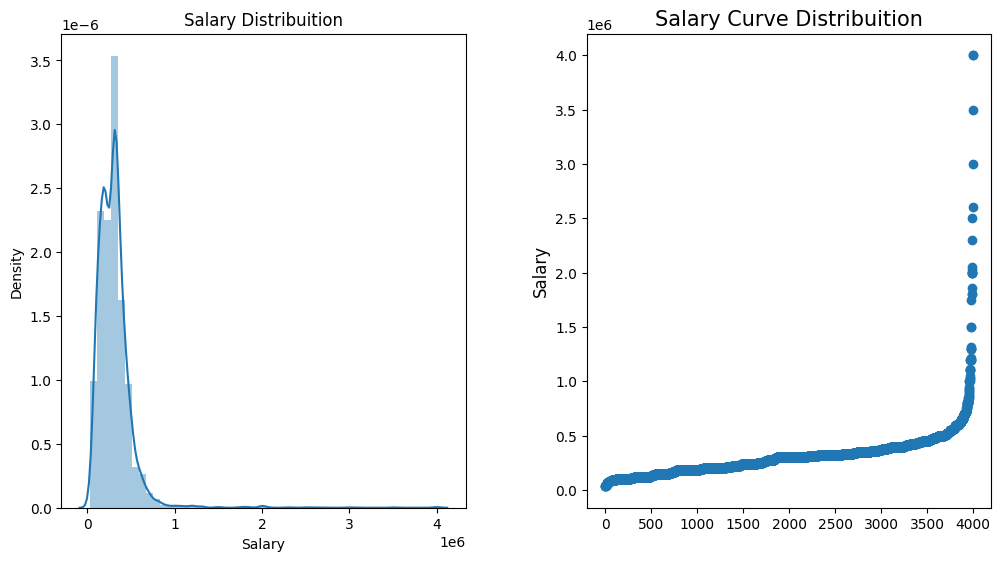

In [31]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Salary Distribuition')
sns.distplot(df['Salary'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.Salary.values))
g1= plt.title("Salary Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Salary", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

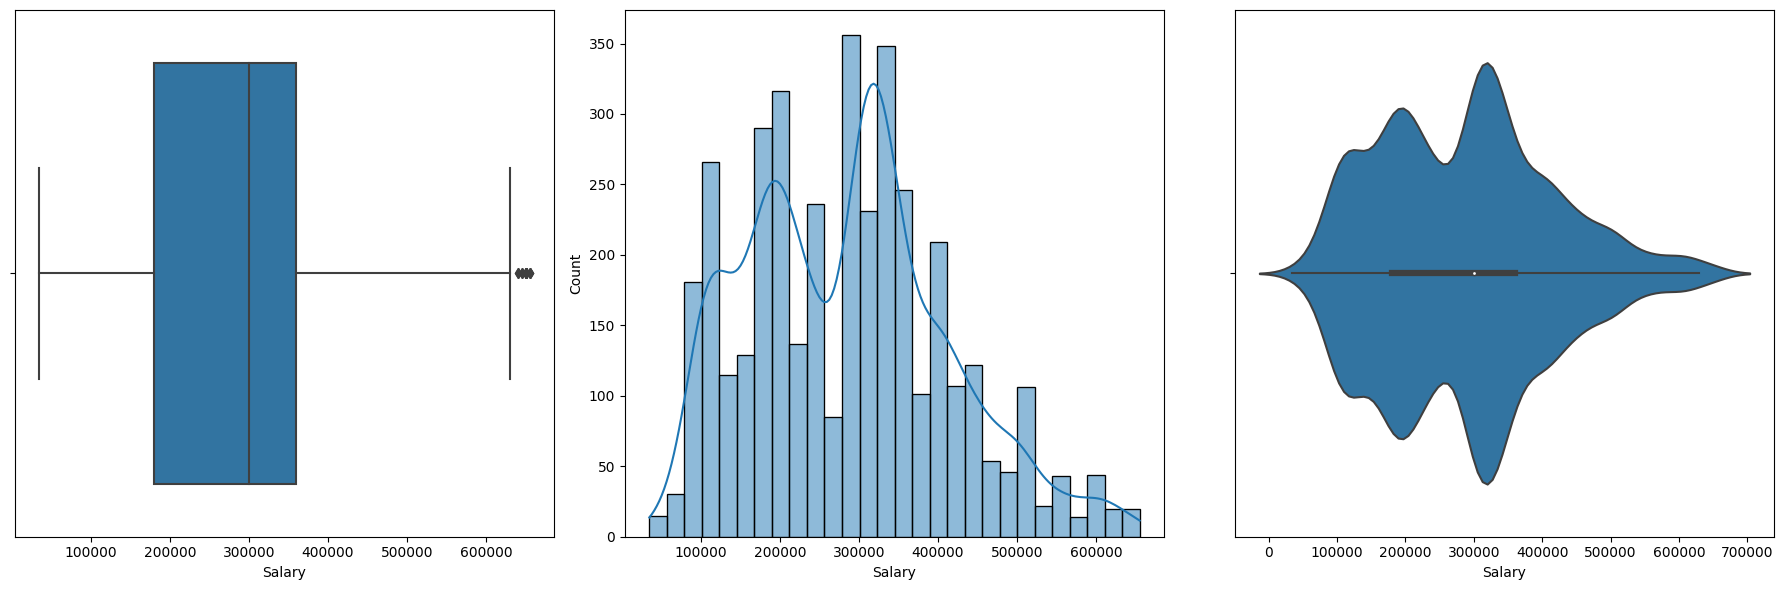

In [32]:
# Without Outliers
plt.figure(figsize=(18, 6))

# Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='Salary', data=df1)

# Histogram with KDE
plt.subplot(1, 3, 2)
sns.histplot(df1['Salary'], kde=True)

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(x='Salary', data=df1)
plt.tight_layout()
plt.show()

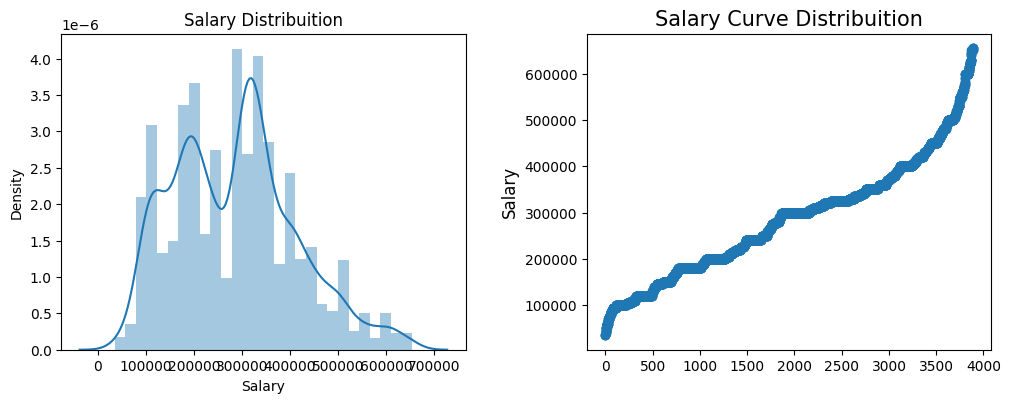

In [33]:
# Without Outliers
plt.figure(figsize = (12, 4))

plt.subplot(121)
plt.title('Salary Distribuition')
sns.distplot(df1['Salary'])

plt.subplot(122)
g1 = plt.scatter(range(df1.shape[0]), np.sort(df1.Salary.values))
g1= plt.title("Salary Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Salary", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

##### Most graduates have salaries under 6 lakhs, indicating a prevalent lower salary range among this group. The distribution of salaries appears to be positively skewed, as evidenced by a long tail on the right-hand side of the distribution compared to the left-hand side. This skewness suggests that while the majority of graduates earn lower salaries, there is a smaller number of graduates earning significantly higher salaries, leading to a rightward skew in the salary distribution

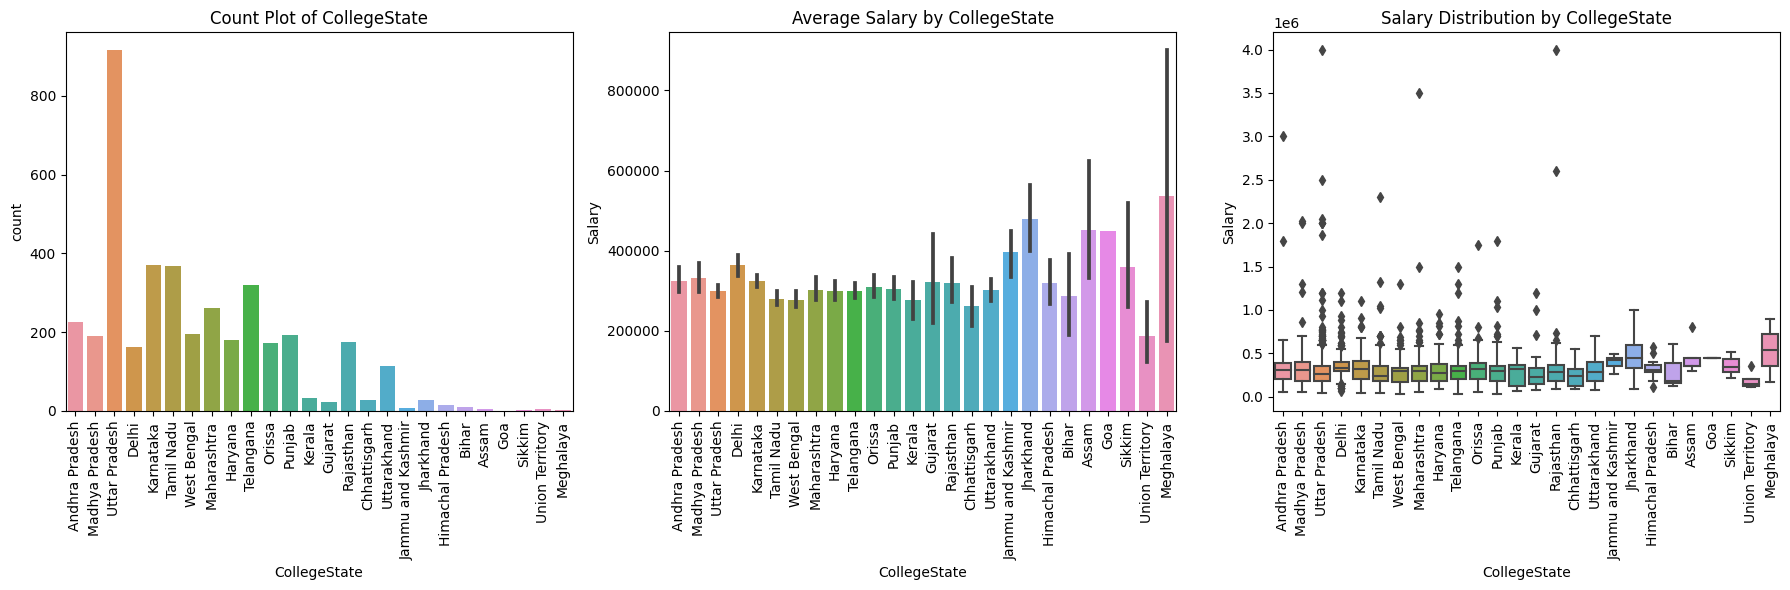

In [34]:
plt.figure(figsize=(18, 6))

# Countplot
plt.subplot(1, 3, 1)
sns.countplot(x='CollegeState', data=df)
plt.title('Count Plot of CollegeState')
plt.xticks(rotation=90)

# Barplot
plt.subplot(1, 3, 2)
sns.barplot(x='CollegeState', y='Salary', data=df)
plt.title('Average Salary by CollegeState')
plt.xticks(rotation=90)

# Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='CollegeState', y='Salary', data=df)
plt.title('Salary Distribution by CollegeState')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

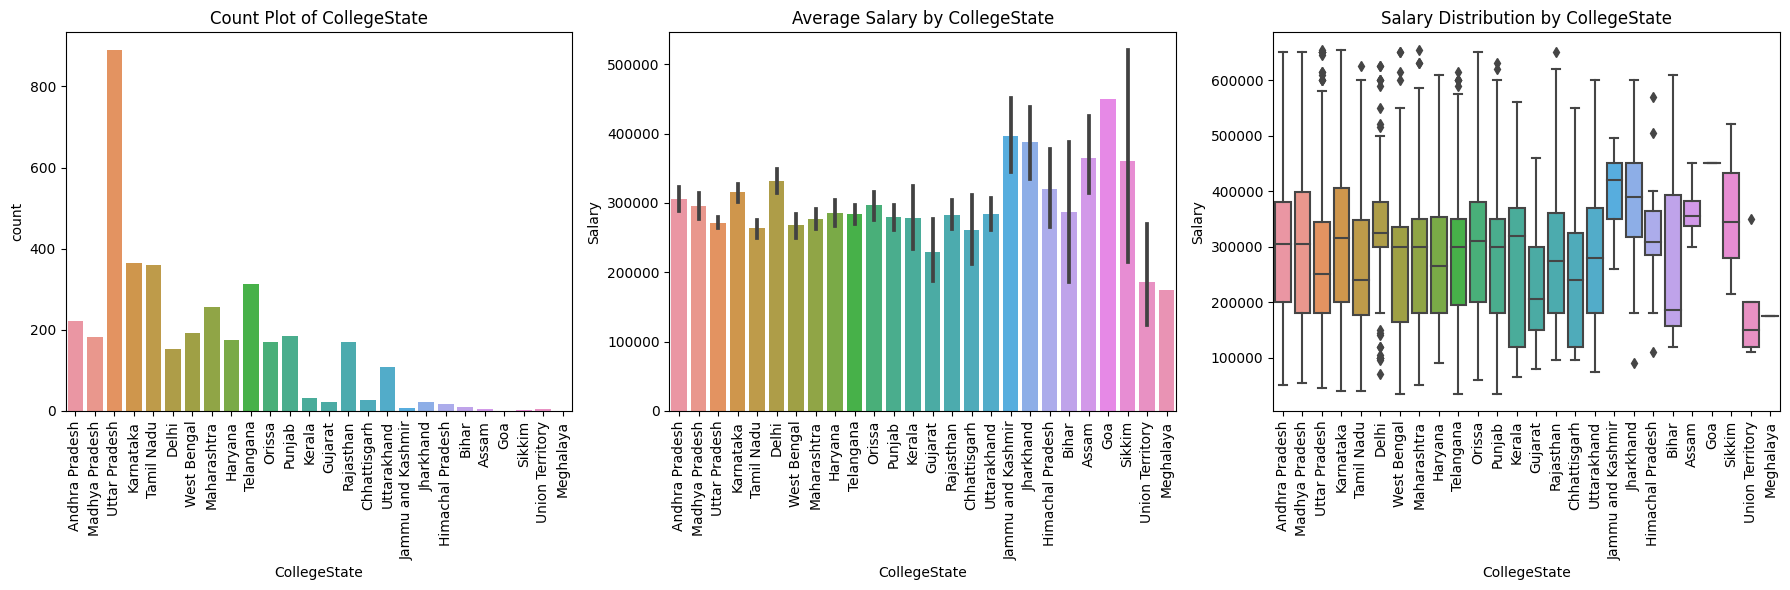

In [35]:
# Without Outliers
plt.figure(figsize=(18, 6))

# Countplot
plt.subplot(1, 3, 1)
sns.countplot(x='CollegeState', data=df1)
plt.title('Count Plot of CollegeState')
plt.xticks(rotation=90)

# Barplot
plt.subplot(1, 3, 2)
sns.barplot(x='CollegeState', y='Salary', data=df1)
plt.title('Average Salary by CollegeState')
plt.xticks(rotation=90)

# Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='CollegeState', y='Salary', data=df1)
plt.title('Salary Distribution by CollegeState')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()





##### It is clearly visible from the plot that the most of the colleges located in Uttar pradesh

# Bivariate Analysis

<Axes: xlabel='12graduation', ylabel='Salary'>

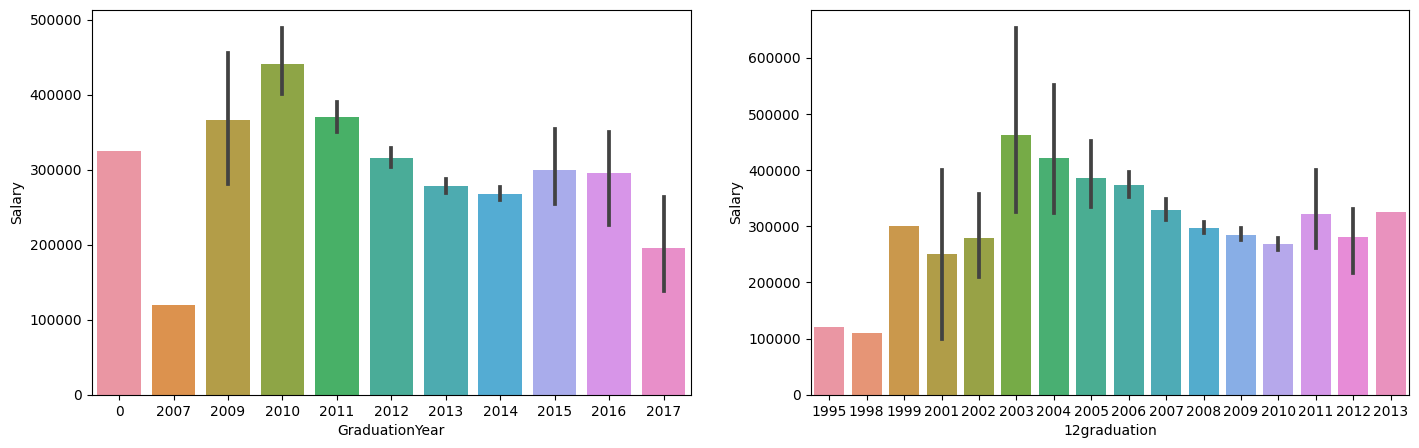

In [36]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
sns.barplot(data = df , x = 'GraduationYear',y = 'Salary')
plt.subplot(1,2,2)
sns.barplot(data = df , x = '12graduation',y = 'Salary')

<Axes: xlabel='12graduation', ylabel='Salary'>

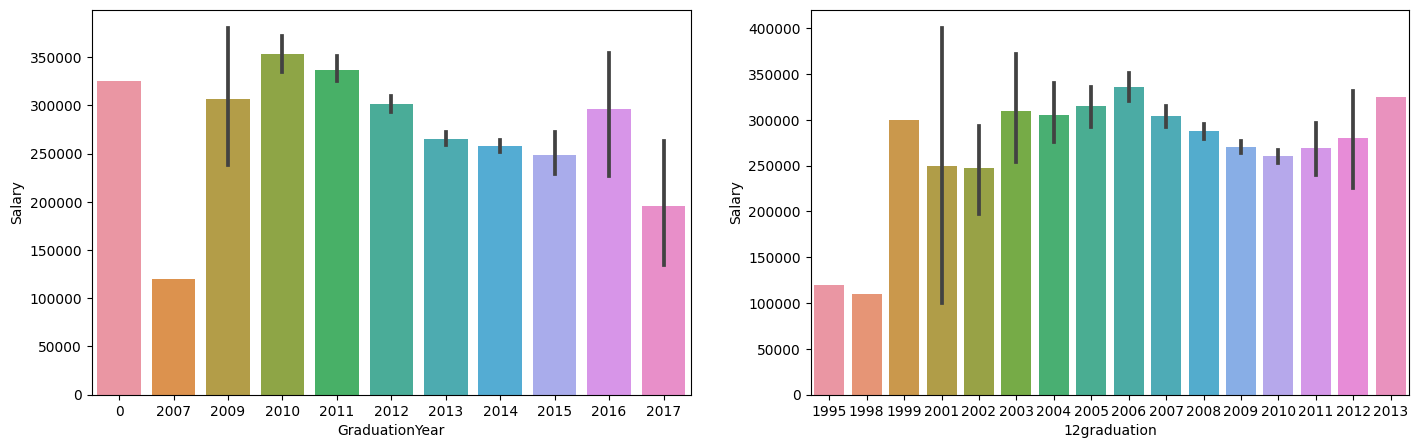

In [37]:
# Without Outliers
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
sns.barplot(data = df1 , x = 'GraduationYear',y = 'Salary')
plt.subplot(1,2,2)
sns.barplot(data = df1 , x = '12graduation',y = 'Salary')

##### The data suggests that individuals who graduated in 2010 tend to have higher salaries.

##### However, after removing outliers, the trend changes, and individuals who completed their 12th grade in 2003 have a higher chance of earning more. This changes to 2015 after removing outliers.

CollegeTier
2    3701
1     297
Name: count, dtype: int64


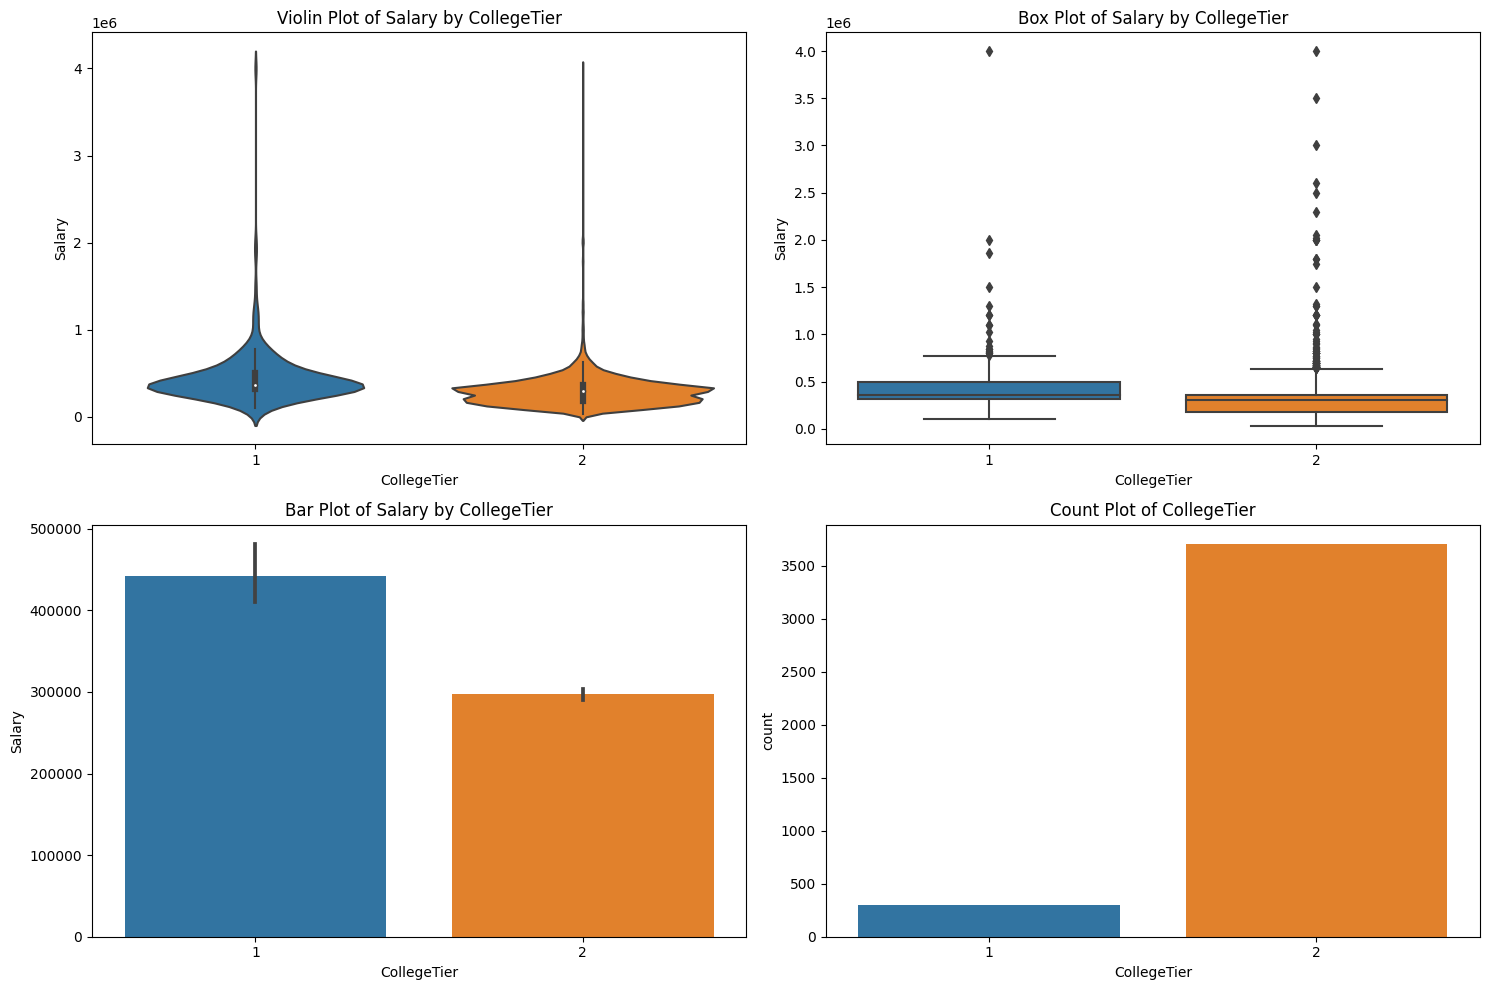

In [38]:
print(df['CollegeTier'].value_counts())
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Violin plot
sns.violinplot(x='CollegeTier', y='Salary', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by CollegeTier')

# Box plot
sns.boxplot(x='CollegeTier', y='Salary', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by CollegeTier')

# Bar plot
sns.barplot(x='CollegeTier', y='Salary', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by CollegeTier')

# Count plot
sns.countplot(x='CollegeTier', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of CollegeTier')

plt.tight_layout()
plt.show()

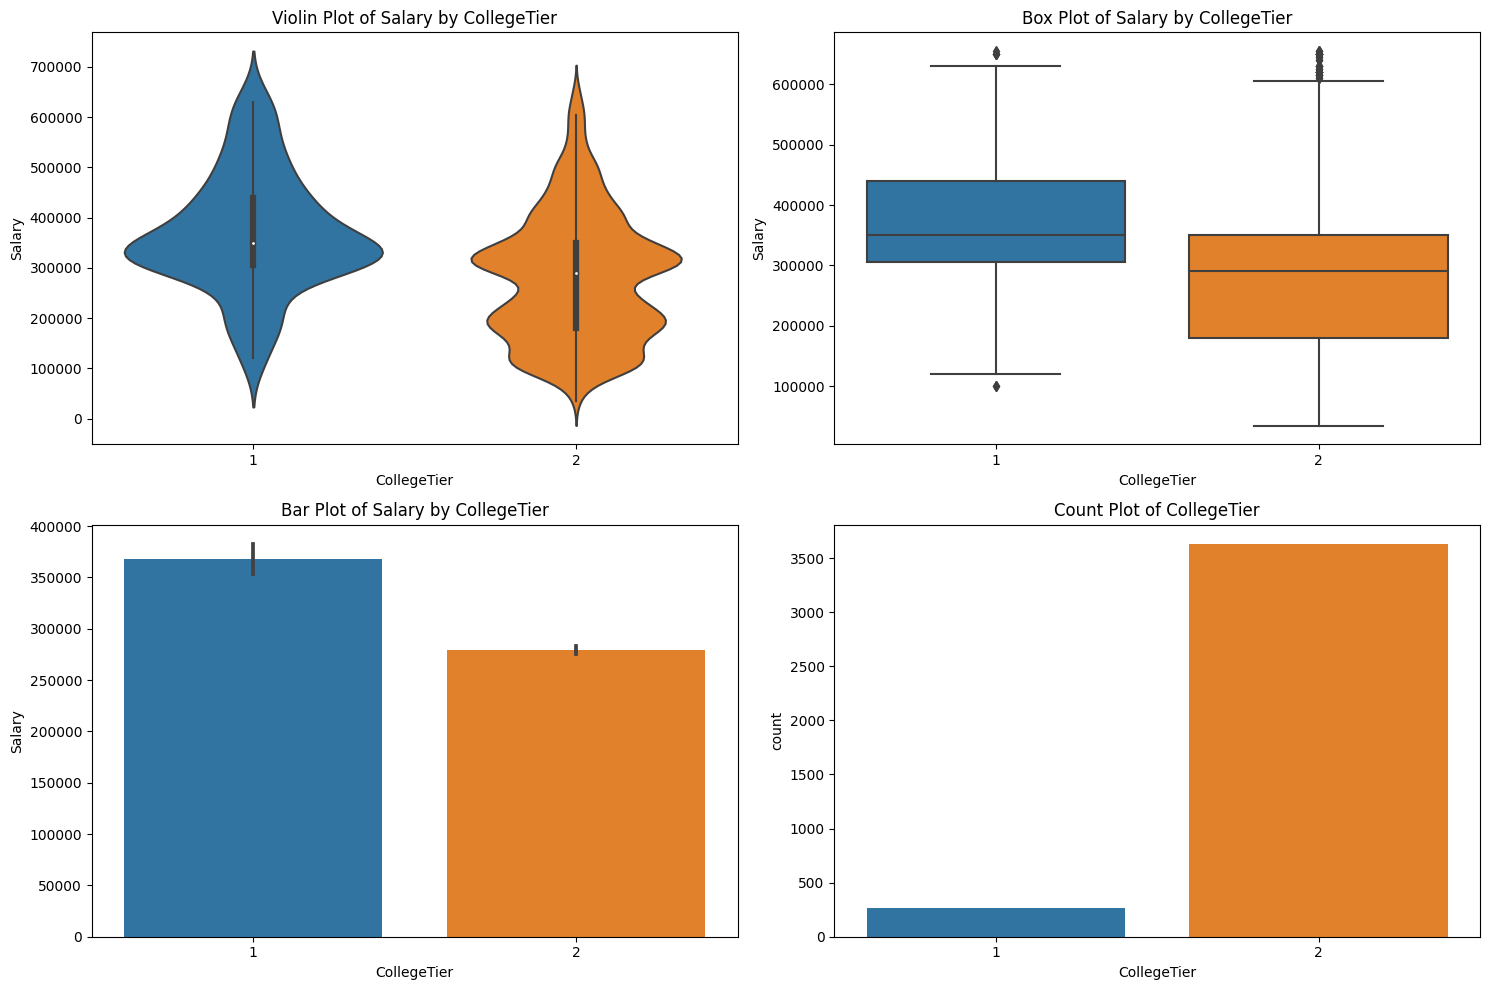

In [39]:
# Without Outliers
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Violin plot
sns.violinplot(x='CollegeTier', y='Salary', data=df1, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by CollegeTier')

# Box plot
sns.boxplot(x='CollegeTier', y='Salary', data=df1, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by CollegeTier')

# Bar plot
sns.barplot(x='CollegeTier', y='Salary', data=df1, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by CollegeTier')

# Count plot
sns.countplot(x='CollegeTier', data=df1, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of CollegeTier')

plt.tight_layout()
plt.show()

##### It is evident from the plot that the average salary for Tier 1 and Tier 2 appears to be higher. However, the number of Tier 2 individuals is three times higher than the number of Tier 1 individuals.

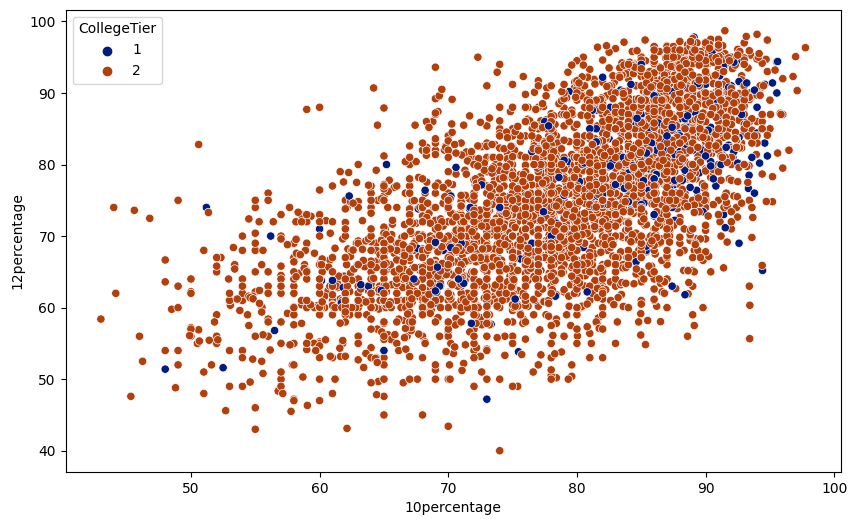

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = '10percentage', y = '12percentage', hue = 'CollegeTier',palette='dark', data = df)
plt.show()

##### Based on the correlation plot and scatterplot, it is evident that the 10th and 12th grades are positively correlated. This indicates multicollinearity between the two variables. To address this issue, I have decided to keep only one of the grades in my analysis

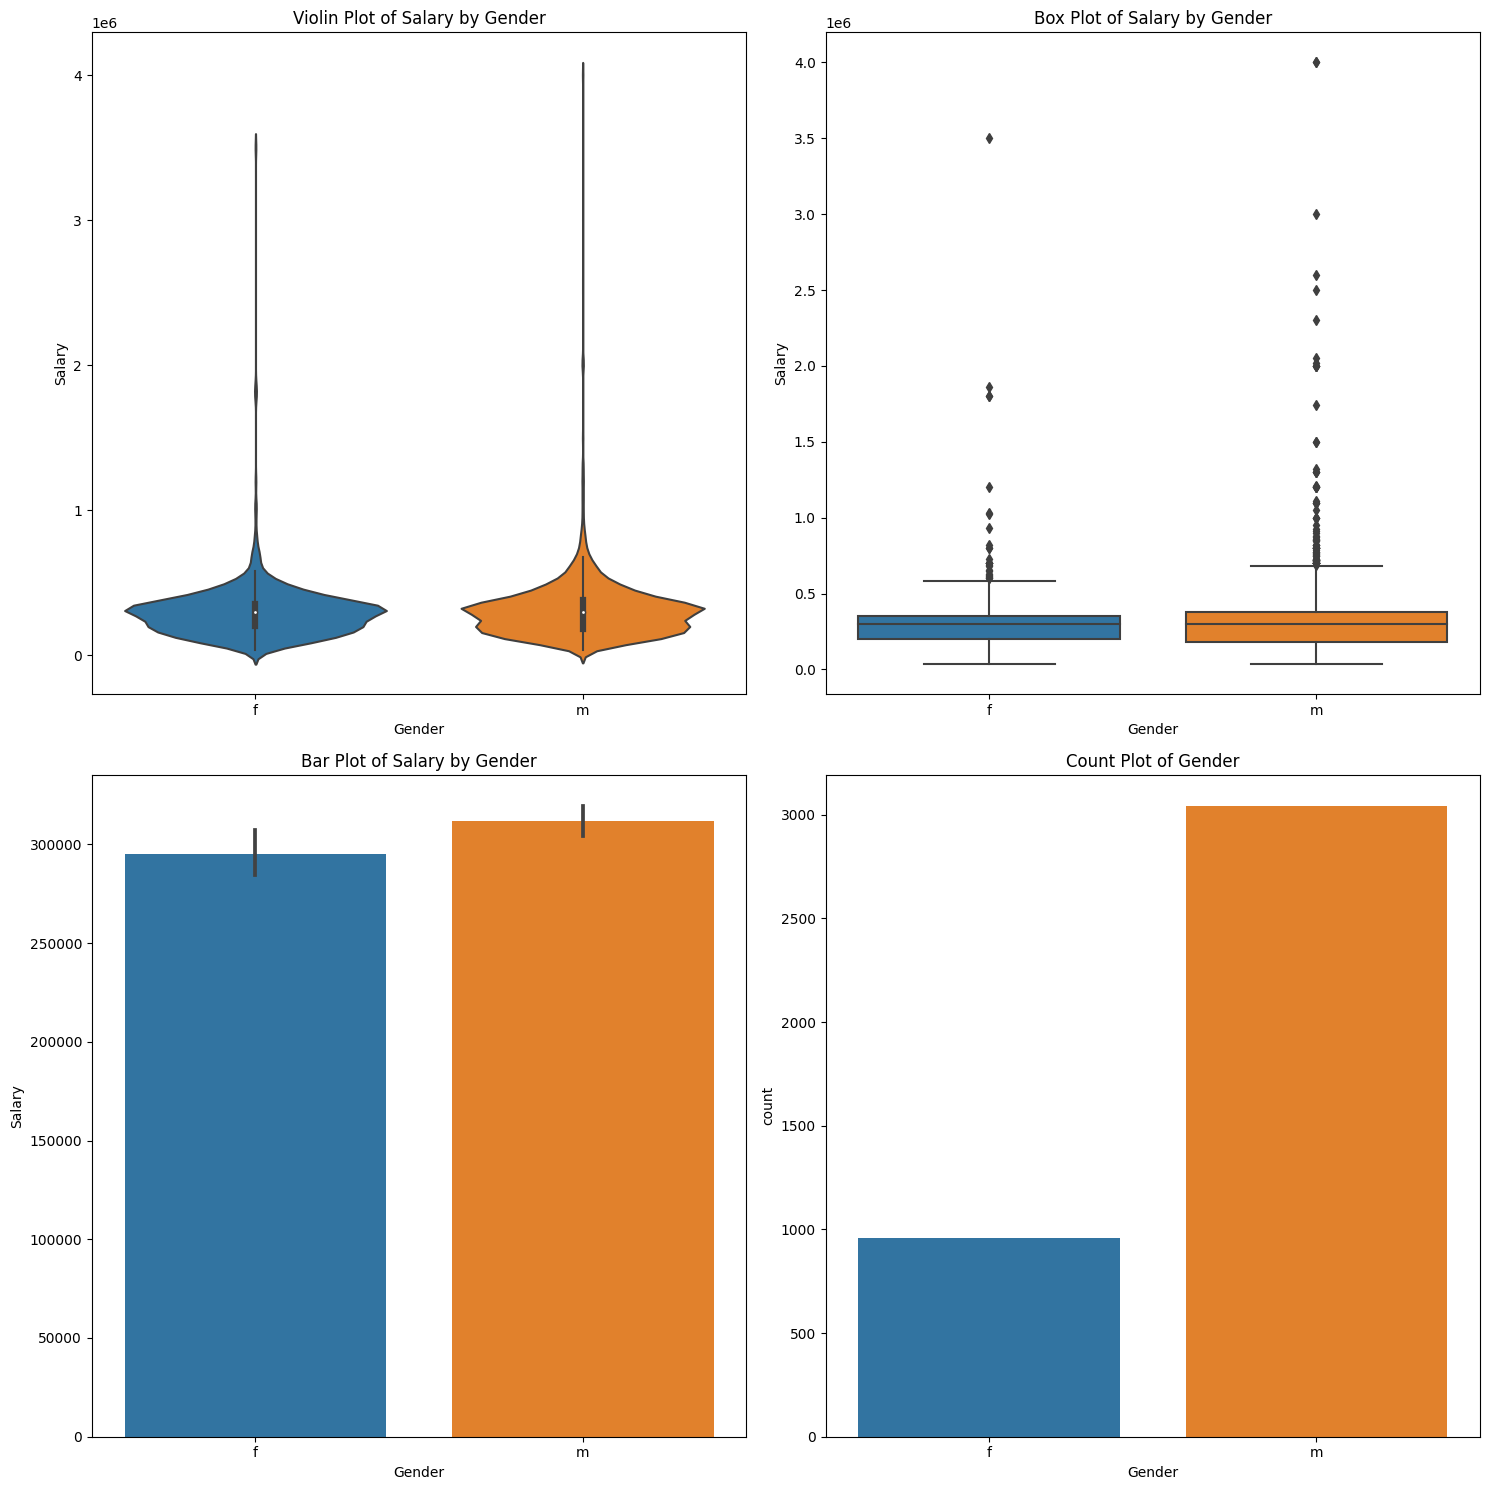

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Violin plot
sns.violinplot(x='Gender', y='Salary', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by Gender')

# Box plot
sns.boxplot(x='Gender', y='Salary', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by Gender')

# Bar plot
sns.barplot(x='Gender', y='Salary', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by Gender')

# Count plot
sns.countplot(x='Gender', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of Gender')

plt.tight_layout()
plt.show()

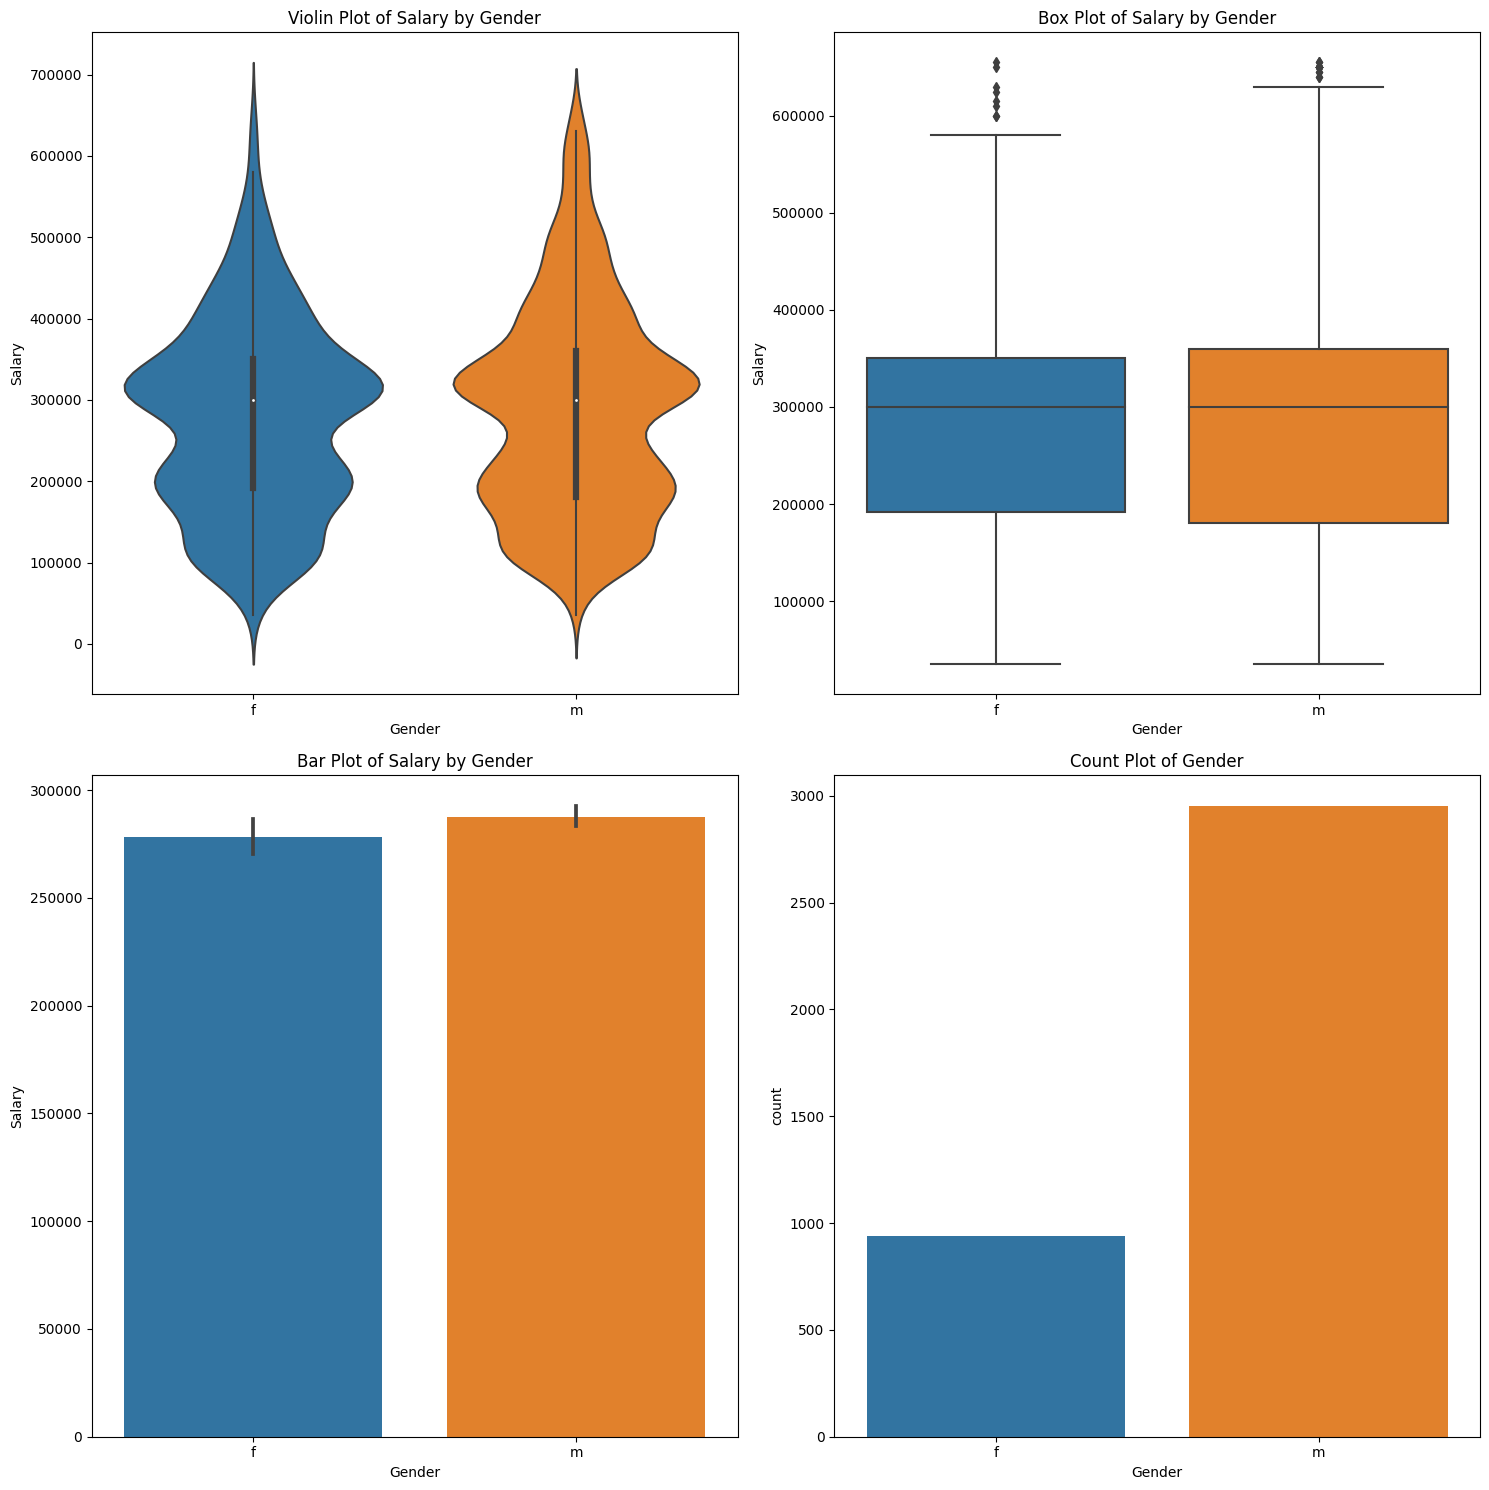

In [42]:
# Without Outliers
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Violin plot
sns.violinplot(x='Gender', y='Salary', data=df1, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by Gender')

# Box plot
sns.boxplot(x='Gender', y='Salary', data=df1, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by Gender')

# Bar plot
sns.barplot(x='Gender', y='Salary', data=df1, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by Gender')

# Count plot
sns.countplot(x='Gender', data=df1, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of Gender')

plt.tight_layout()
plt.show()

##### It is evident from the plot that the average salary for men and women appears to be almost the same. However, the number of males is three times higher than the number of females.

Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64


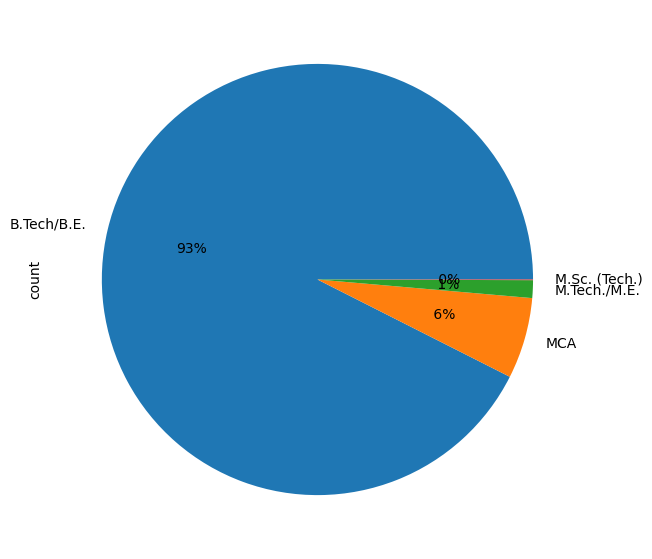

In [43]:
plt.figure(figsize = (7,7))
df['Degree'].value_counts().plot(kind = 'pie', autopct='%2.0f%%')

print(df['Degree'].value_counts())

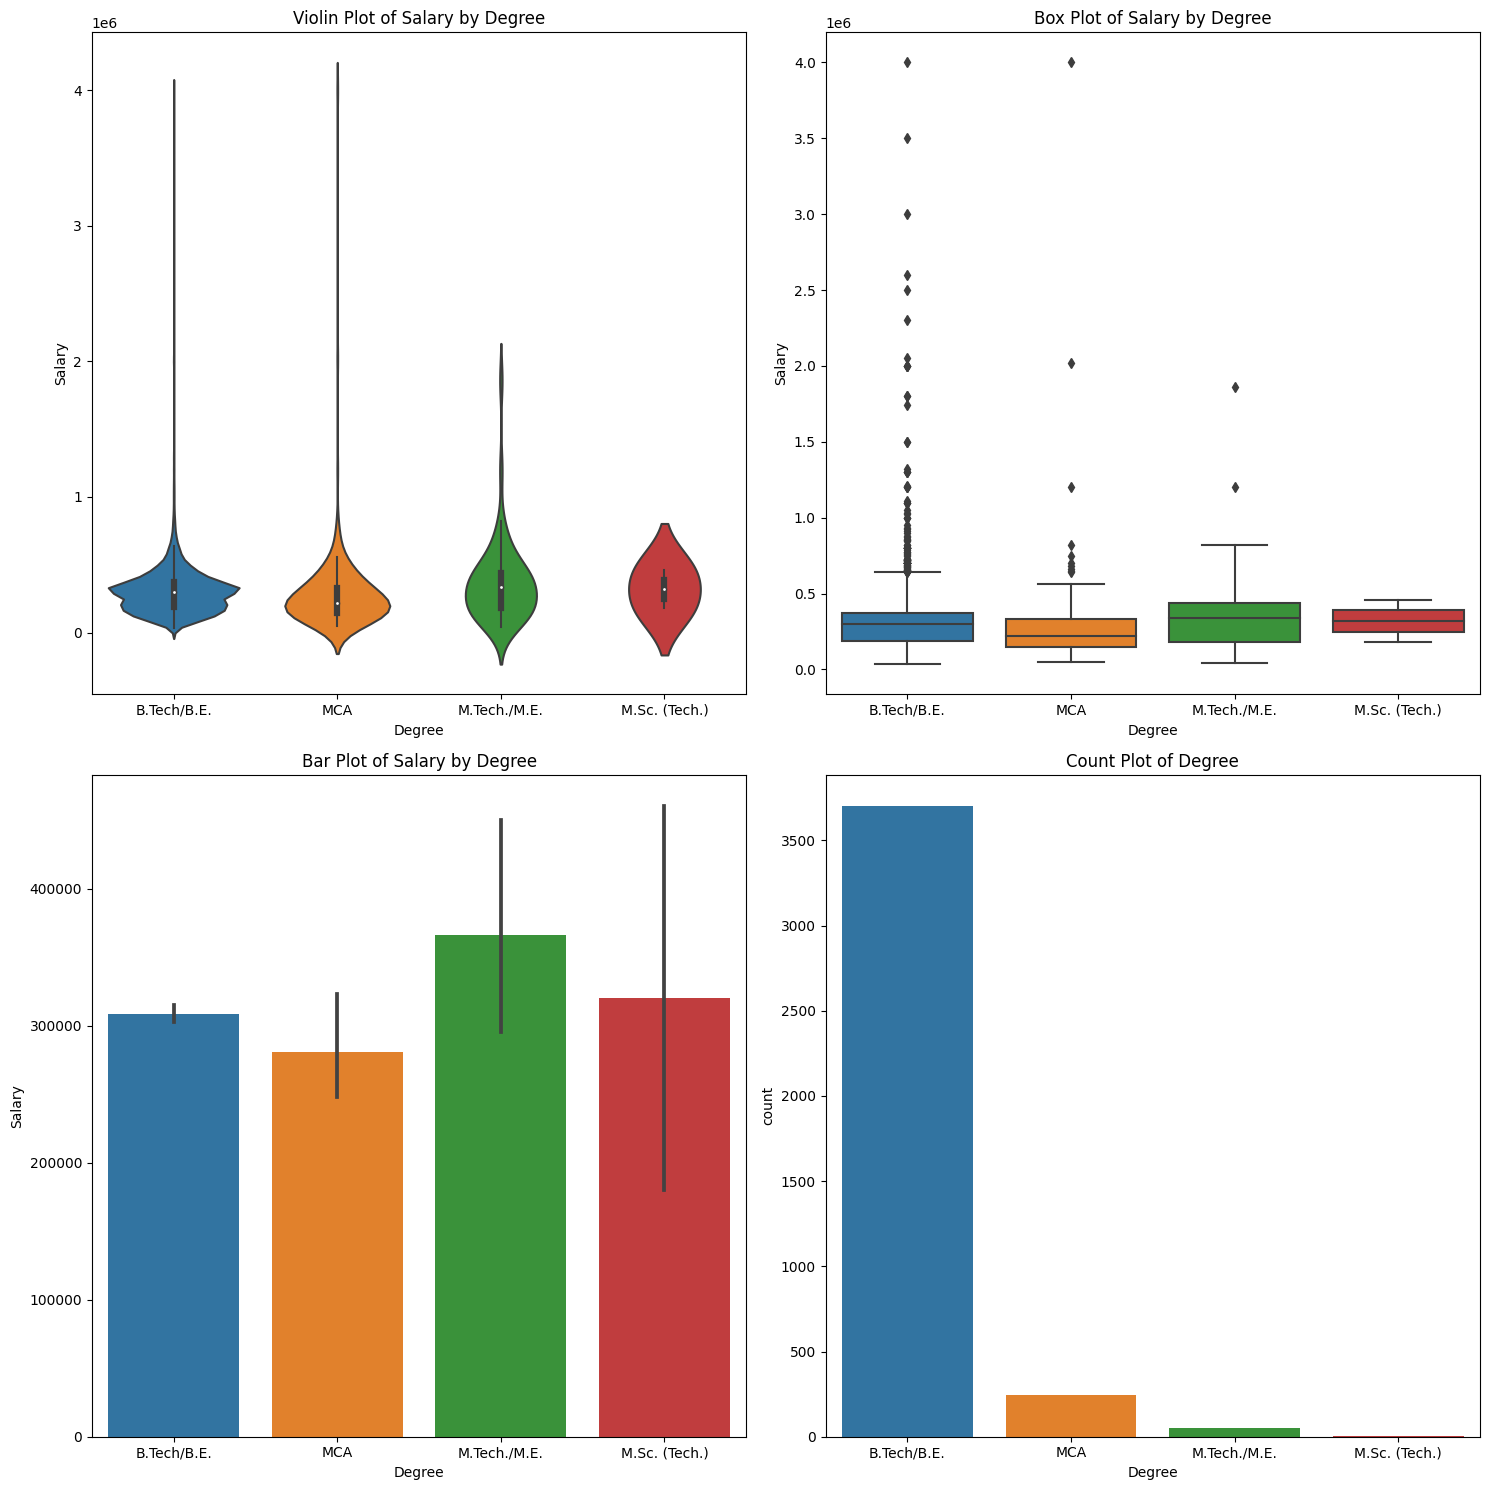

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Violin plot
sns.violinplot(x='Degree', y='Salary', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by Degree')

# Box plot
sns.boxplot(x='Degree', y='Salary', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by Degree')

# Bar plot
sns.barplot(x='Degree', y='Salary', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by Degree')

# Count plot
sns.countplot(x='Degree', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of Degree')

plt.tight_layout()
plt.show()

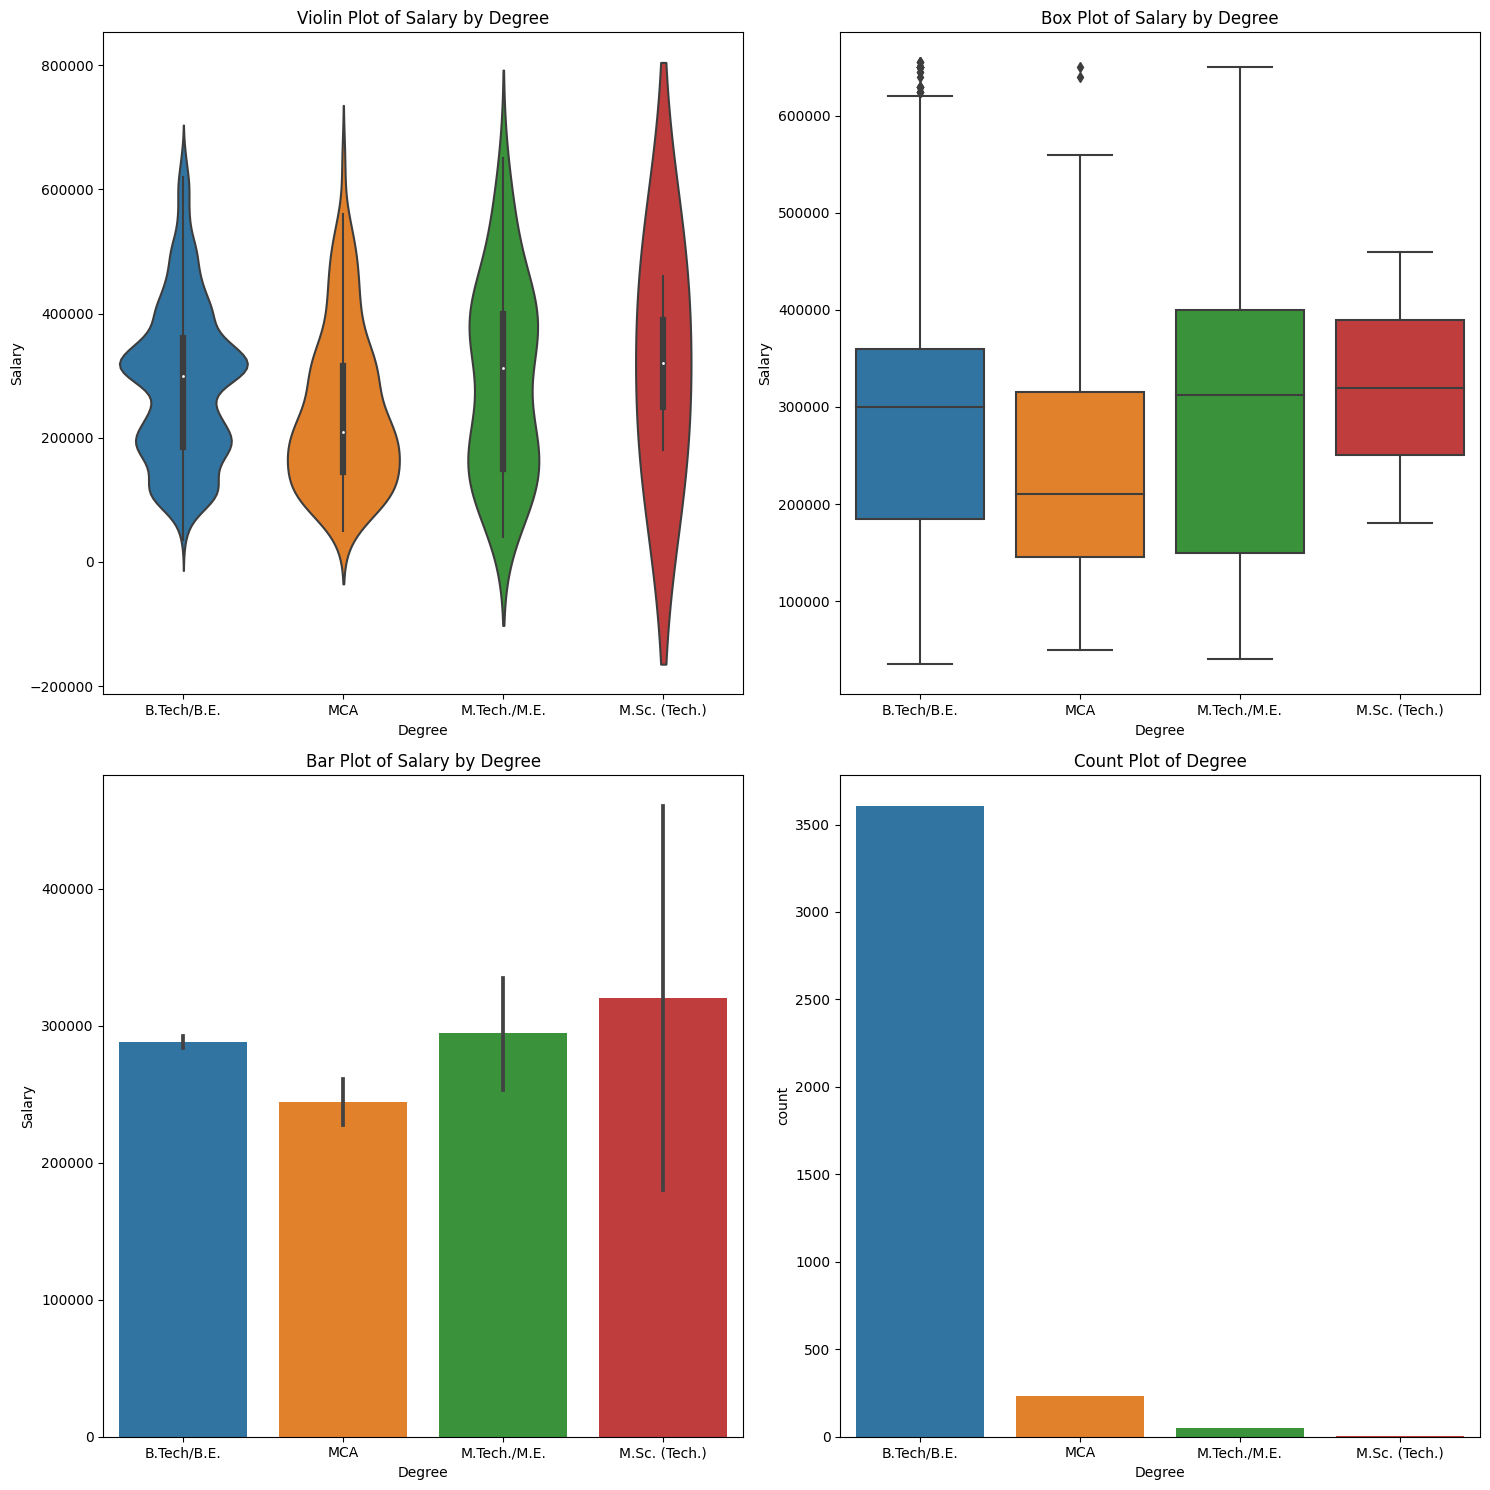

In [45]:
# Without Outliers
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Violin plot
sns.violinplot(x='Degree', y='Salary', data=df1, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by Degree')

# Box plot
sns.boxplot(x='Degree', y='Salary', data=df1, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by Degree')

# Bar plot
sns.barplot(x='Degree', y='Salary', data=df1, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by Degree')

# Count plot
sns.countplot(x='Degree', data=df1, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of Degree')

plt.tight_layout()
plt.show()


##### Average salary is highest for BE/B.tech graduates as compared to any other degree graduates.
##### According to the graph below, only 7 percent of BTech students are pursuing higher education, indicating that the majority of BTech students are not continuing their studies beyond their current degree.

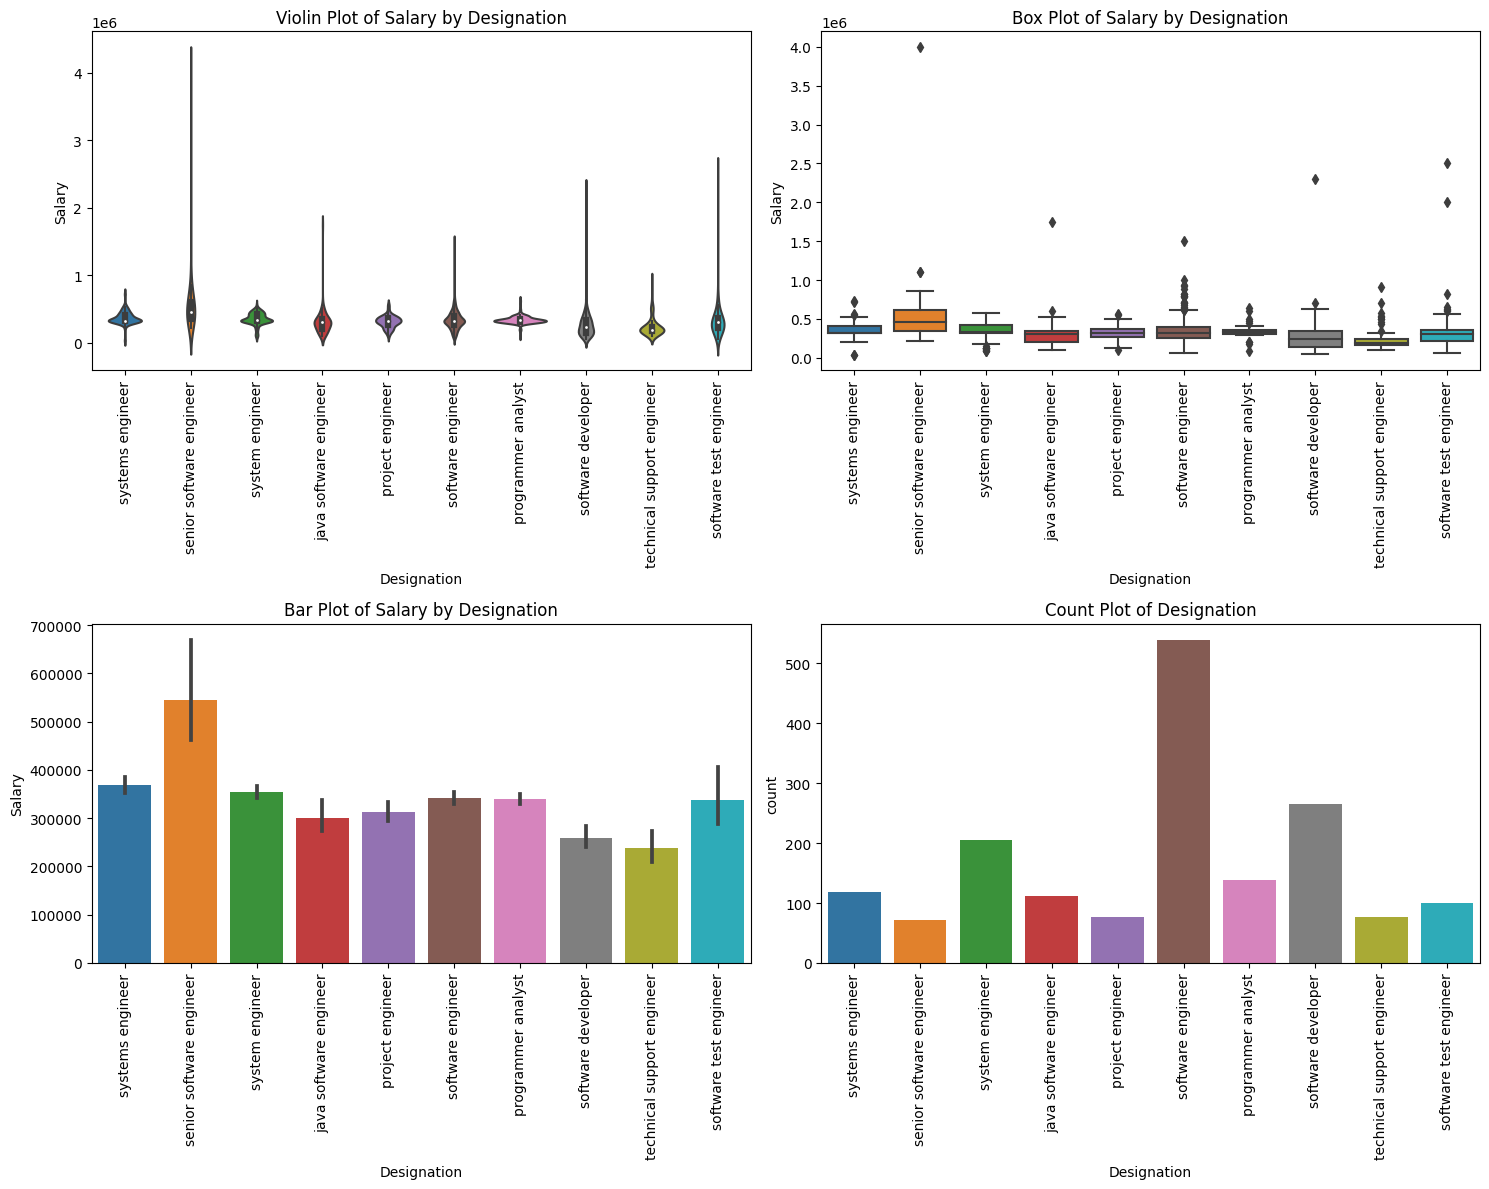

In [46]:
top_10_designations = df['Designation'].value_counts().head(10).index
df_top_10 = df[df['Designation'].isin(top_10_designations)]

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Violin plot
sns.violinplot(x='Designation', y='Salary', data=df_top_10, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by Designation')
axs[0, 0].tick_params(axis='x', rotation=90)

# Box plot
sns.boxplot(x='Designation', y='Salary', data=df_top_10, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by Designation')
axs[0, 1].tick_params(axis='x', rotation=90)

# Bar plot
sns.barplot(x='Designation', y='Salary', data=df_top_10, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by Designation')
axs[1, 0].tick_params(axis='x', rotation=90)

# Count plot
sns.countplot(x='Designation', data=df_top_10, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of Designation')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

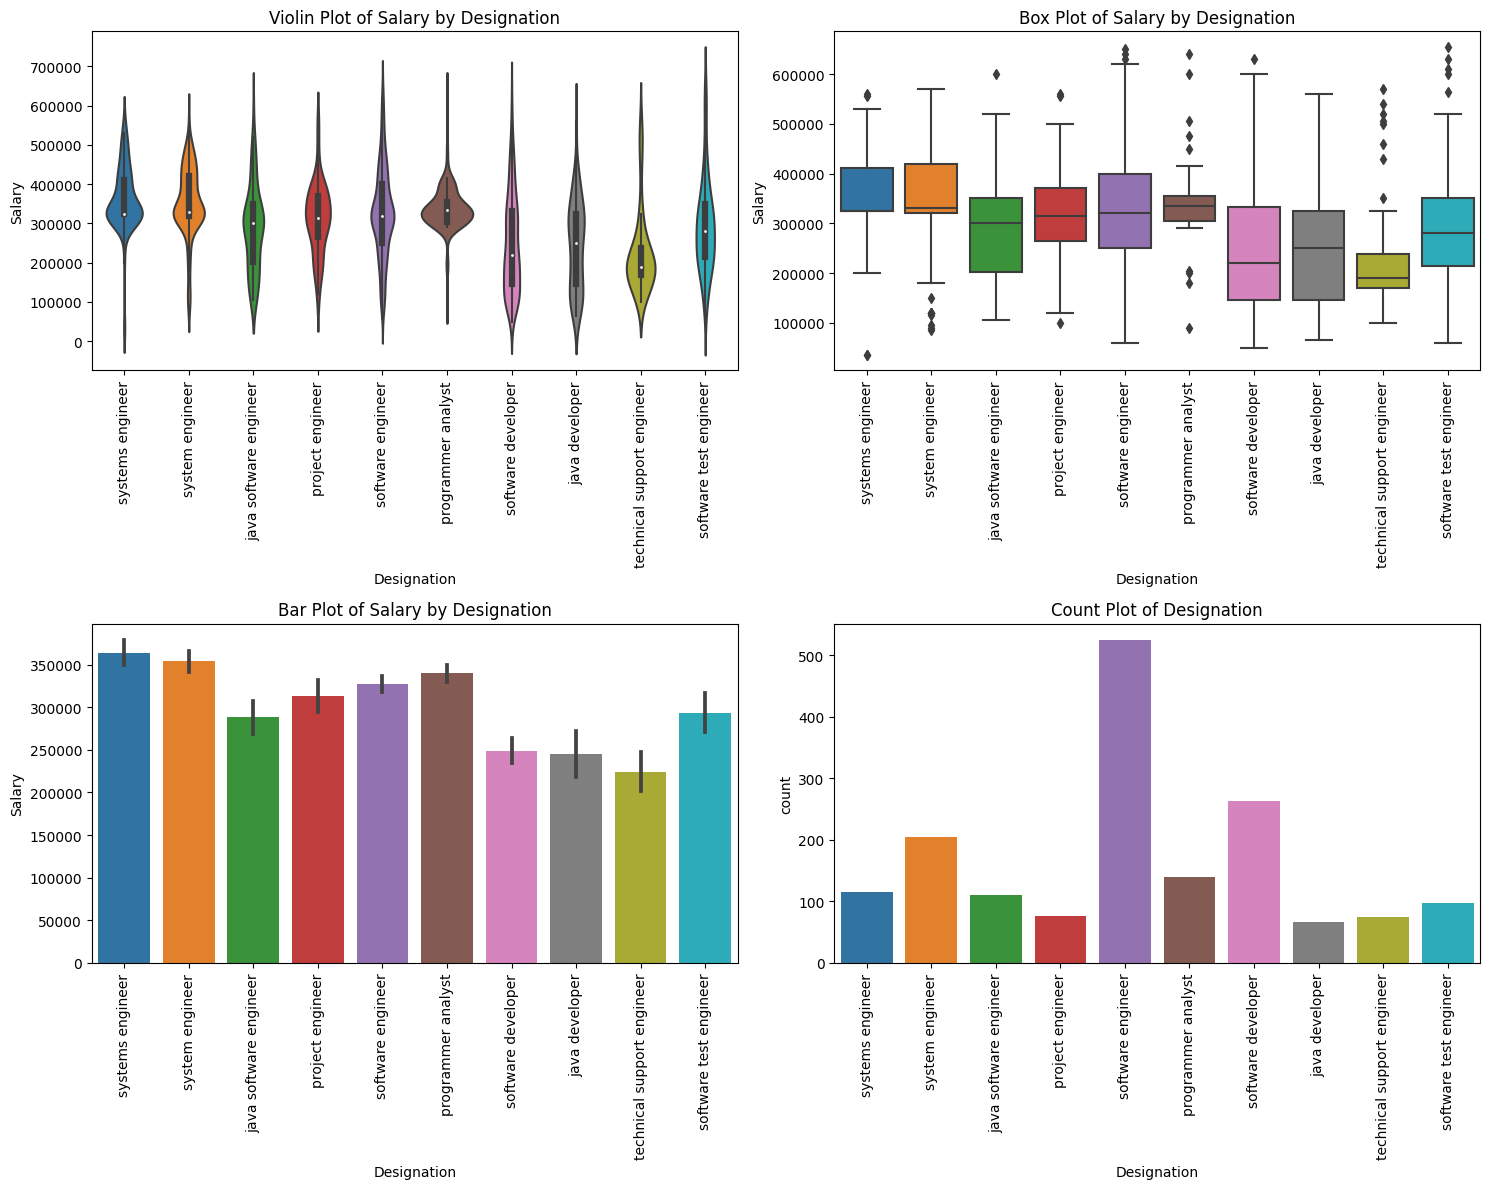

In [47]:
# Without Outliers
top_10_designations = df1['Designation'].value_counts().head(10).index
df1_top_10 = df1[df1['Designation'].isin(top_10_designations)]

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Violin plot
sns.violinplot(x='Designation', y='Salary', data=df1_top_10, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by Designation')
axs[0, 0].tick_params(axis='x', rotation=90)

# Box plot
sns.boxplot(x='Designation', y='Salary', data=df1_top_10, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by Designation')
axs[0, 1].tick_params(axis='x', rotation=90)

# Bar plot
sns.barplot(x='Designation', y='Salary', data=df1_top_10, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by Designation')
axs[1, 0].tick_params(axis='x', rotation=90)

# Count plot
sns.countplot(x='Designation', data=df1_top_10, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of Designation')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##### In the plot, senior software engineers earn more than other software employees.

##### However, after removing outliers, the salaries are almost the same across different software employee roles.

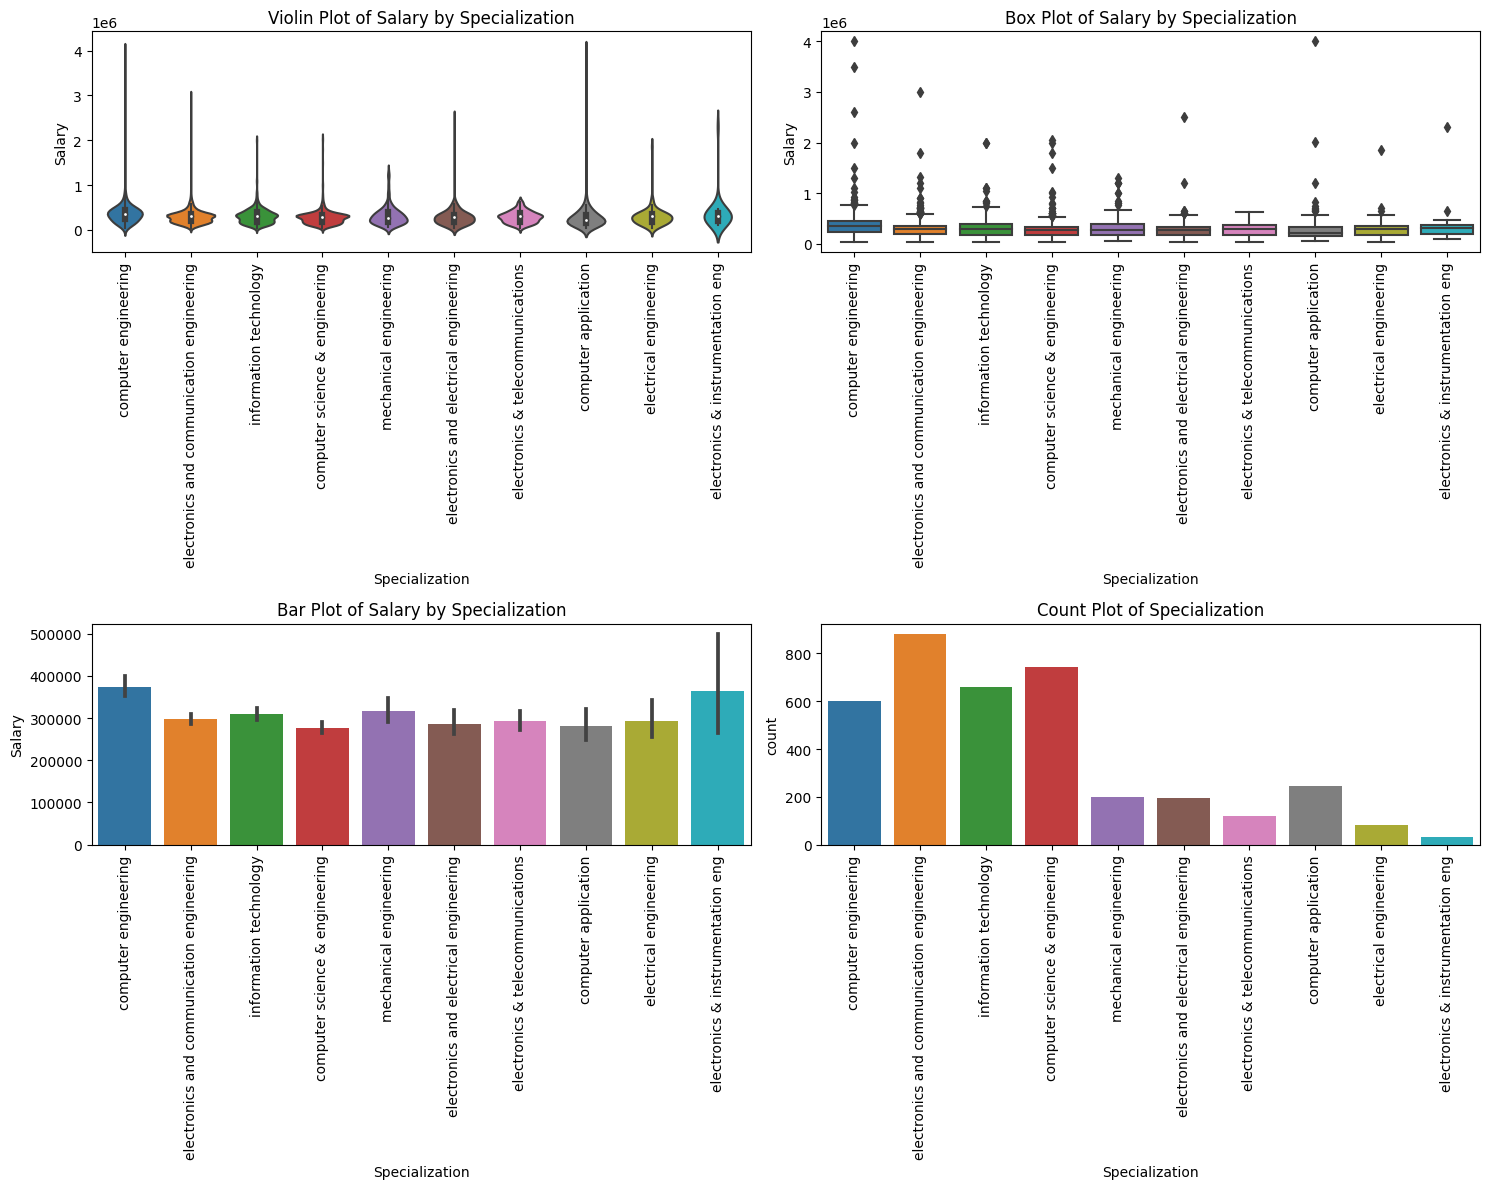

In [48]:
top_10_designations = df['Specialization'].value_counts().head(10).index
df_top_10 = df[df['Specialization'].isin(top_10_designations)]

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Violin plot
sns.violinplot(x='Specialization', y='Salary', data=df_top_10, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by Specialization')
axs[0, 0].tick_params(axis='x', rotation=90)

# Box plot
sns.boxplot(x='Specialization', y='Salary', data=df_top_10, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by Specialization')
axs[0, 1].tick_params(axis='x', rotation=90)

# Bar plot
sns.barplot(x='Specialization', y='Salary', data=df_top_10, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by Specialization')
axs[1, 0].tick_params(axis='x', rotation=90)

# Count plot
sns.countplot(x='Specialization', data=df_top_10, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of Specialization')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


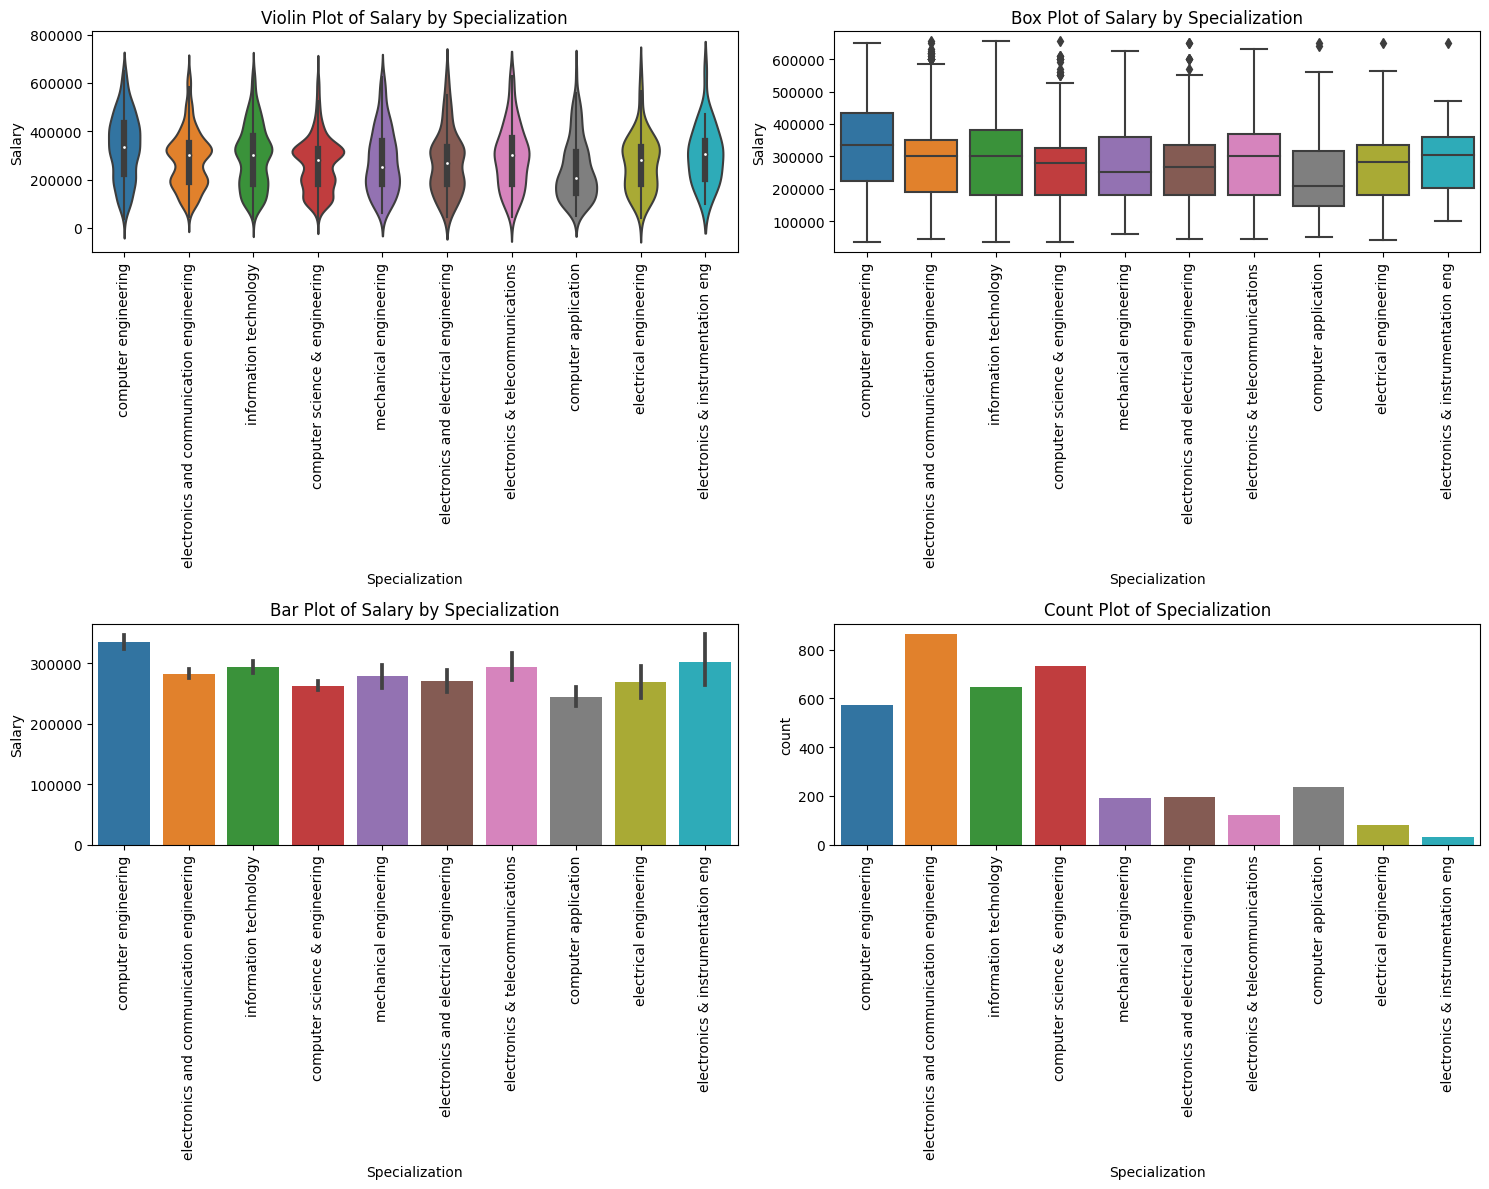

In [49]:
# Without Outliers
top_10_designations = df1['Specialization'].value_counts().head(10).index
df1_top_10 = df1[df1['Specialization'].isin(top_10_designations)]

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Violin plot
sns.violinplot(x='Specialization', y='Salary', data=df1_top_10, ax=axs[0, 0])
axs[0, 0].set_title('Violin Plot of Salary by Specialization')
axs[0, 0].tick_params(axis='x', rotation=90)

# Box plot
sns.boxplot(x='Specialization', y='Salary', data=df1_top_10, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary by Specialization')
axs[0, 1].tick_params(axis='x', rotation=90)

# Bar plot
sns.barplot(x='Specialization', y='Salary', data=df1_top_10, ax=axs[1, 0])
axs[1, 0].set_title('Bar Plot of Salary by Specialization')
axs[1, 0].tick_params(axis='x', rotation=90)

# Count plot
sns.countplot(x='Specialization', data=df1_top_10, ax=axs[1, 1])
axs[1, 1].set_title('Count Plot of Specialization')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##### It is clearly visible from the plot that the Average salary is below 5 Lakh but In the plot computer engineering students earn more than other department

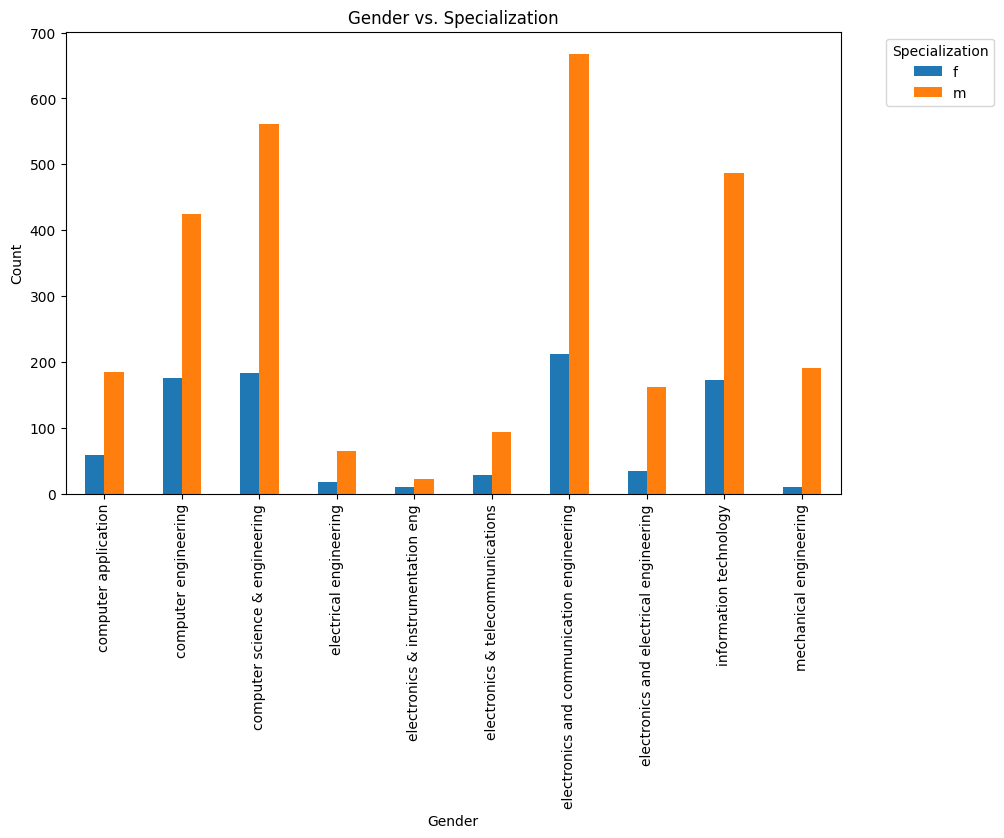

In [50]:
contingency_table = pd.crosstab(df_top_10['Specialization'], df['Gender'])

# Plotting
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Specialization')
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### There are almost males 2 times as of females in every specialization. Also, there are very less number of females who opted for mechanical and electronics.

Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64


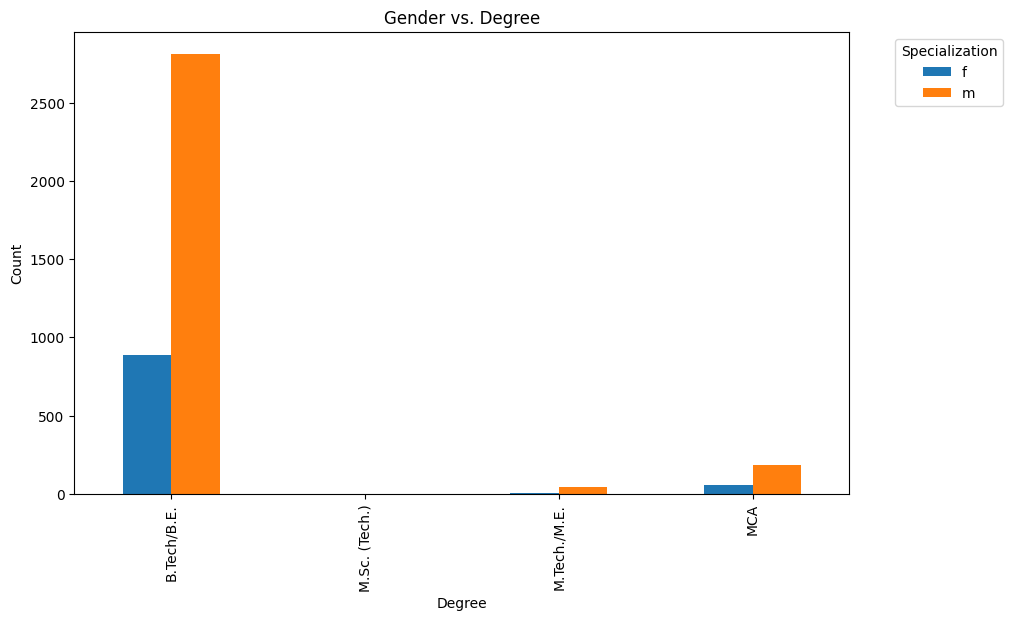

In [51]:
# Without Outliers
contingency_table = pd.crosstab(df['Degree'], df['Gender'])
print(df['Degree'].value_counts())
# Plotting
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Gender vs. Degree')
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# -	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you

In [52]:
filtered_data = df1[(df1['Specialization'] == 'computer science & engineering') &
    (df1['Designation'].isin(['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']))]

# Calculate the average salary
average_salary = filtered_data['Salary'].mean()
average_salary

320543.47826086957

##### With an average salary of approximately 332,943.26 INR, the data suggests that fresh graduates in Computer Science Engineering working in the specified job roles (Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer) earn higher than the claimed range of 2.5-3 lakhs as mentioned in the Times of India article

# Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

In [53]:
# Assuming 'data' is your DataFrame with 'Gender' and 'Specialization' columns
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 104.46891913608455
P-value: 1.2453868176976918e-06


##### The small p-value suggests that the observed distribution of specializations is unlikely to have occurred by chance if there were no actual relationship between gender and specialization.

# "Does the academic performance, specifically scoring above 70% in 12th grade and above 60% in BE/BTech, significantly impact job selection for fresher candidates in Computer Science Engineering, compared to candidates with an MTech, MCA, MSc, or ME degree scoring above 55%?"

In [54]:
# Filter the dataset based on the criteria
filtered_data = df[
    ((df['12percentage'] > 70) & (df['Degree'] == 'B.Tech/B.E.') & (df['collegeGPA'] > 60)) |
    ((df['Degree'].isin(['M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'])) & (df['collegeGPA'] > 55))
]

# Check the proportion of selected candidates
selected_proportion = len(filtered_data) / len(df)

selected_proportion

0.6548274137068534

##### The output indicates that approximately 65.48% of candidates meet the specified criteria for job selection based on academic performance and degree.

# Conclusion

Senior Software Engineers earn the highest salaries but with 
more variability, while Software Developers and Technical 
Support Engineers earn below the average. Gender has a minor 
impact on average salary, with females earning less. Academic 
performance, based on 10th, 12th, and college GPA scores, does 
not show a clear correlation with pay